<h1 align="center"><u>Explainability AI Project</u></h1>
<h3 align="center"><u>Clément MOLLY-MITTON  | Diane VERBECQ  |  Raphaël VIGNAL</u></h3>
<h3 align="center"><u>Paul ESCALIER</u></h3>

# Table of Contents
1. [Introduction](#introduction)
2. [Import](#imports)
3. [Data exploration and cleaning](#data-exploration-and-cleaning)
4. [Models and evaluation](#models-and-evaluation)     
5. [Conclusion](#conclusion)

# Introduction
***
Our group has chosen to work on the subject of Analysis and Optimization of Energy Consumption. For context : 

Against a backdrop of energy transition and global warming, companies and organizations need to reduce their environmental impact while optimizing their resources. Controlling energy consumption is a strategic factor in meeting these global challenges.
The aim of this project is to give you the opportunity to work on real-life problems linked to energy analysis, mobilizing your skills in data management, predictive modeling and operational recommendations.

<font color='darkred'><b>We have decided to use a Jupyter Notebook since it is the tool we are all familiar with and have used in class. Unfortunately, we have never worked with or received training on dashboards such as Power BI. Therefore, we created an equivalent using a Jupyter Notebook with widgets and the Plotly library. However, due to the structure of .ipynb files, it is necessary to re-execute the notebook to view and interact with the different filters properly.</b></font>

<font color='darkred'><b>For example you can see below 3 display of the dashboard we created.</b></font>

![map](./assets/map.png)

![trend](./assets/trend_line.png)

![donut](./assets//donut.png)


# Imports
***

We import all the necessary libraries for our study.

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Data Exploration and Cleaning
***

Now, let's import our dataset, which we found on Kaggle (https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption). It is a dataset maintained by multiple contributors on a voluntary basis, compiling a vast amount of information on global energy consumption, with a particular focus on electricity consumption and energy expenditures. Since this dataset is maintained by multiple contributors with verified sources, it is both reliable and highly relevant for our study.

In [2]:
original_data = pd.read_csv(r'dataset\World Energy Consumption.csv', delimiter= ',')
display(original_data.info())
display(original_data.head(5))
display(original_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


None

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,22012.000000,1.812300e+04,1.111300e+04,1747.000000,2687.000000,2302.000000,2767.000000,5275.000000,5527.000000,5492.000000,...,6849.000000,4035.000000,2413.000000,4639.000000,4744.000000,7065.000000,7996.000000,4065.000000,6886.000000,4101.000000
mean,1974.213247,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.716800,10.966685,1.954035,...,0.622750,0.210395,267.541206,7.314174,53.422938,62.811828,17.561153,232.108949,1.404910,0.651413
std,35.058653,4.640460e+08,2.411179e+12,274.616745,10.057018,264.707851,111.623148,201.043915,47.953561,5.274155,...,2.066186,0.643304,5940.944120,37.327922,273.255306,252.734217,101.693172,733.841324,4.489043,1.893820
min,1900.000000,1.833000e+03,1.642060e+08,-100.000000,-50.843000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-51.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1946.000000,1.712404e+06,1.365898e+10,-0.616500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1984.000000,6.991543e+06,4.167411e+10,8.179000,0.000000,15.482000,0.673000,0.146000,0.010000,0.062000,...,0.000000,0.000000,20.000000,0.000000,0.005000,0.000000,0.000000,0.051000,0.000000,0.003000
75%,2003.000000,2.557688e+07,1.744295e+11,26.508500,0.861500,165.266750,13.629500,34.289000,0.690000,1.577500,...,0.095000,0.018500,47.971000,0.315000,2.357750,2.101000,0.140000,45.523000,0.372000,0.268000
max,2022.000000,7.975105e+09,1.136302e+14,5659.328000,141.131000,2588.512000,1199.207000,2514.102000,677.570000,71.429000,...,40.000000,7.586000,242384.844000,665.413000,5487.600000,3219.852000,2139.230000,8422.012000,56.840000,26.157000


In [3]:
display(original_data.columns)

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

We can see that this dataset contains a large number of columns (129). To determine which columns to keep, we will refer to the GitHub repository (https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv) where the dataset originates, as it provides detailed explanations for each column's specificity. Based on this resource, we will select only the columns relevant to our study and proceed with data cleaning afterward.

In [4]:
column_to_keep = [
    # Basic info per country
    "country",
    "year",
    "iso_code",
    "population",
    "gdp", # PIB

    # Annual electricity generation
    "biofuel_electricity",
    "coal_electricity",
    "fossil_electricity",
    "gas_electricity",
    "hydro_electricity",
    "nuclear_electricity",
    "oil_electricity",
    "solar_electricity",
    "wind_electricity",

    # Electricity generation per person
    "biofuel_elec_per_capita",
    "coal_elec_per_capita",
    "fossil_elec_per_capita",
    "gas_elec_per_capita",
    "hydro_elec_per_capita",
    "nuclear_elec_per_capita",
    "oil_elec_per_capita",
    "solar_elec_per_capita",
    "wind_energy_per_capita",

    # Carbon and gas emission
    "carbon_intensity_elec",
    "greenhouse_gas_emissions",
]

So the explanation of the selected columns is:
| Column | Description | Unit | Source |
|--------|------------|------|--------|
| country | Country - Geographic location. | nan | Our World in Data - Regions (2023) |
| year | Year - Year of observation. | nan | Our World in Data - Regions (2023) |
| iso_code | ISO code - ISO 3166-1 alpha-3 three-letter country codes. | nan | International Organization for Standardization - Regions (2023) |
| population | Population - Population by country, available from 10,000 BCE to 2100, based on data and estimates from different sources. | persons | [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| gdp | Gross domestic product (GDP) - This data is adjusted for inflation and differences in the cost of living between countries. | international-$ in 2011 prices | [Maddison Project Database 2023](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2023) |
| biofuel_electricity | Electricity generation from bioenergy - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| coal_electricity | Electricity generation from coal - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| fossil_electricity | Electricity generation from fossil fuels - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| gas_electricity | Electricity generation from gas - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| hydro_electricity | Electricity generation from hydropower - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| nuclear_electricity | Electricity generation from nuclear - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| oil_electricity | Electricity generation from oil - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| solar_electricity | Electricity generation from solar power - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| wind_electricity | Electricity generation from wind power - Measured in terawatt-hours. | terawatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |
| biofuel_elec_per_capita | Electricity generation from bioenergy per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| coal_elec_per_capita | Electricity generation from coal per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| fossil_elec_per_capita | Electricity generation from fossil fuels per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| gas_elec_per_capita | Electricity generation from gas per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| hydro_elec_per_capita | Electricity generation from hydropower per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| nuclear_elec_per_capita | Electricity generation from nuclear power per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| oil_elec_per_capita | Electricity generation from oil per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| solar_elec_per_capita | Electricity generation from solar power per person - Measured in kilowatt-hours per person. | kilowatt-hours | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| wind_energy_per_capita | Wind power consumption per capita - Measured in kilowatt-hours per person. | kilowatt-hours | [Energy Institute - Statistical Review of World Energy (2024)](https://www.energyinst.org/statistical-review/); [Population based on various sources (2023)](https://ourworldindata.org/population-sources) |
| carbon_intensity_elec | Carbon intensity of electricity generation - Greenhouse gases emitted per unit of generated electricity, measured in grams of CO₂ equivalents per kilowatt-hour. | grams of CO₂ eq/kWh | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/); [Energy Institute - Statistical Review of World Energy (2024)](https://www.energyinst.org/statistical-review/) |
| greenhouse_gas_emissions | Emissions from electricity generation - Measured in megatonnes of CO₂ equivalents. | million tonnes CO₂ eq | [Ember - Yearly Electricity Data (2024)](https://ember-climate.org/data-catalogue/yearly-electricity-data/) |


We will retain only the data from the selected columns for the next step.

In [5]:
df_analysis = original_data[column_to_keep]
display(df_analysis)

,country,year,iso_code,population,gdp,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,...,coal_elec_per_capita,fossil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,solar_elec_per_capita,wind_energy_per_capita,carbon_intensity_elec,greenhouse_gas_emissions
0,ASEAN (Ember),2000,NaN,NaN,NaN,5.60,71.03,295.75,163.22,50.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.231,184.41
1,ASEAN (Ember),2001,NaN,NaN,NaN,6.02,80.02,320.51,185.35,54.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.358,198.34
2,ASEAN (Ember),2002,NaN,NaN,NaN,6.06,87.16,346.83,203.52,53.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505.652,213.80
3,ASEAN (Ember),2003,NaN,NaN,NaN,6.69,98.51,371.44,216.92,53.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513.698,229.70
4,ASEAN (Ember),2004,NaN,NaN,NaN,7.57,111.62,407.92,237.97,52.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.910,252.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.39,3.69,3.73,0.00,5.05,...,245.147,247.804,0.0,335.499,0.0,2.657,1.329,NaN,355.822,3.27
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,0.38,3.62,3.66,0.00,4.17,...,235.760,238.365,0.0,271.580,0.0,2.605,1.954,NaN,387.136,3.19
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,0.35,3.36,3.40,0.00,3.81,...,214.427,216.980,0.0,243.145,0.0,2.553,1.915,NaN,389.987,2.96
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,0.38,3.57,3.61,0.00,4.00,...,223.215,225.716,0.0,250.101,0.0,2.501,2.501,NaN,392.279,3.15


Let's now check the number of missing values in the dataset for the selected columns.

In [6]:
df_analysis.isnull().sum()

country                         0
year                            0
iso_code                     5500
population                   3889
gdp                         10899
biofuel_electricity         16485
coal_electricity            15568
fossil_electricity          15462
gas_electricity             15568
hydro_electricity           13128
nuclear_electricity         13496
oil_electricity             15568
solar_electricity           14056
wind_electricity            14016
biofuel_elec_per_capita     16737
coal_elec_per_capita        16162
fossil_elec_per_capita      16056
gas_elec_per_capita         16162
hydro_elec_per_capita       14134
nuclear_elec_per_capita     14365
oil_elec_per_capita         16162
solar_elec_per_capita       14981
wind_energy_per_capita      17947
carbon_intensity_elec       16847
greenhouse_gas_emissions    16706
dtype: int64

<Axes: >

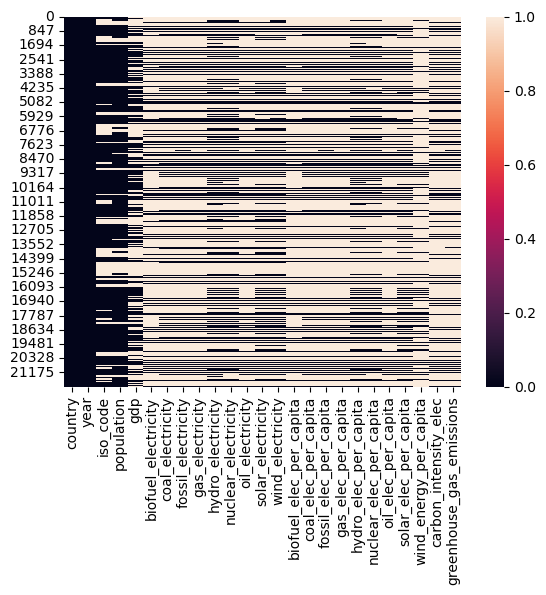

In [7]:
sns.heatmap(df_analysis.isnull())

In [8]:
null_per_column = (df_analysis.isnull().sum() / df_analysis.shape[0] ) * 100
null_per_column

country                      0.000000
year                         0.000000
iso_code                    24.986371
population                  17.667636
gdp                         49.513902
biofuel_electricity         74.890969
coal_electricity            70.725059
fossil_electricity          70.243504
gas_electricity             70.725059
hydro_electricity           59.640196
nuclear_electricity         61.312012
oil_electricity             70.725059
solar_electricity           63.856079
wind_electricity            63.674359
biofuel_elec_per_capita     76.035799
coal_elec_per_capita        73.423587
fossil_elec_per_capita      72.942032
gas_elec_per_capita         73.423587
hydro_elec_per_capita       64.210431
nuclear_elec_per_capita     65.259858
oil_elec_per_capita         73.423587
solar_elec_per_capita       68.058332
wind_energy_per_capita      81.532800
carbon_intensity_elec       76.535526
greenhouse_gas_emissions    75.894966
dtype: float64

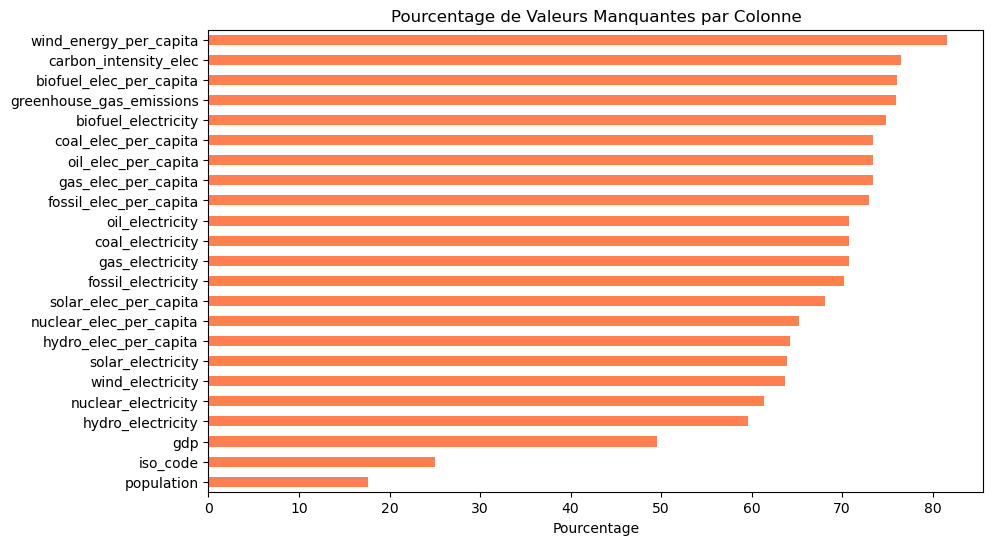

In [9]:
missing_percentages = df_analysis.isnull().mean() * 100
missing_percentages = missing_percentages[missing_percentages > 0]
missing_percentages.sort_values(inplace=True)

missing_percentages.plot(kind='barh', color='coral', figsize=(10, 6))
plt.title("Pourcentage de Valeurs Manquantes par Colonne")
plt.xlabel("Pourcentage")
plt.show()

We can see that there is a significant amount of missing data, which can be explained by the fact that some countries do not produce certain types of energy. Additionally, discrepancies in data availability across different countries and time periods contribute to these gaps. We can also see that we have a some country which are a group of country or continent. We will try to clean them so that we only have the raw data. Now, let's check if there are any years with no data at all. 

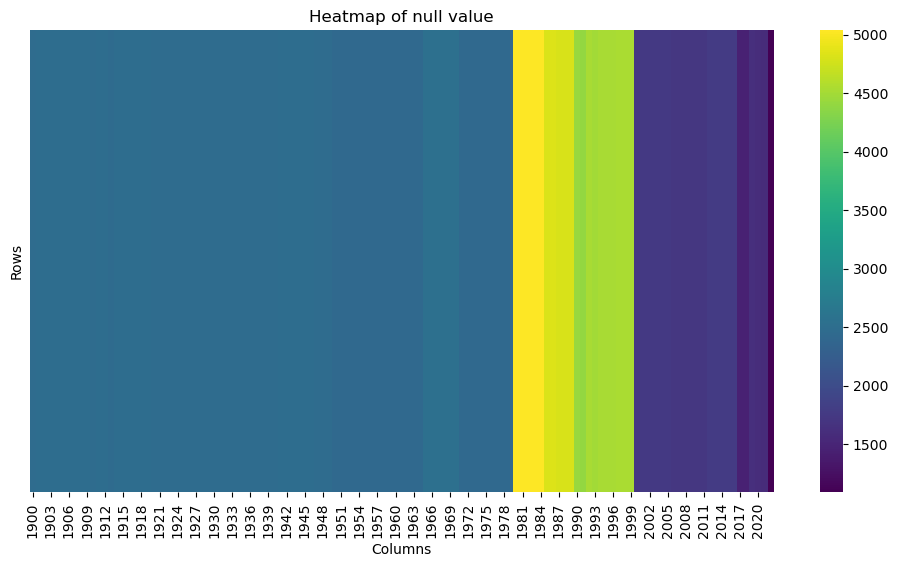

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_analysis.isnull().groupby(df_analysis["year"]).sum().sum(axis=1).to_frame().T, cmap="viridis", cbar=True, yticklabels=False)
plt.title("Heatmap of null value")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

Lets do the same analysis of null value for the different country

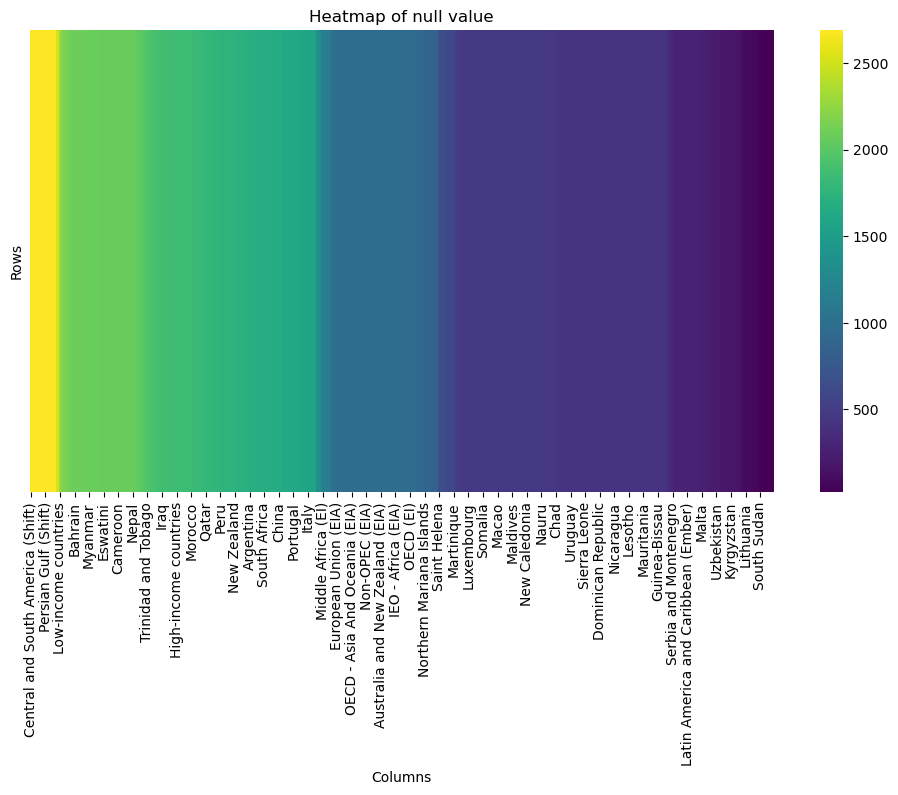

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_analysis.isnull().groupby(df_analysis["country"]).sum().sum(axis=1).sort_values(ascending=False).to_frame().T, cmap="viridis", cbar=True, yticklabels=False)
plt.title("Heatmap of null value")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

As we can see, the availability of data varies depending on the country and the year, which confirms our hypothesis. Moreover, since we are conducting an analysis, we will retain as much data as possible to maximize our insights.

Now, let's begin cleaning our data before proceeding with any visualizations. First of all lets clean the country column :

In [12]:
for country in df_analysis["country"].unique():
    print(country)

ASEAN (Ember)
Afghanistan
Africa
Africa (EI)
Africa (Ember)
Africa (Shift)
Albania
Algeria
American Samoa
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia
Asia & Oceania (EIA)
Asia (Ember)
Asia Pacific (EI)
Asia and Oceania (Shift)
Australia
Australia and New Zealand (EIA)
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
CIS (EI)
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central & South America (EIA)
Central African Republic
Central America (EI)
Central and South America (Shift)
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Czechoslovakia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
EU28 (Shift)
East Germany (EIA)
East Timor
Eastern Africa (EI)
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethio

We can see that some entries represent groups of countries or entire continents. Since our analysis focuses on individual countries, we will exclude these entries from the dataset.

In [13]:
country_to_delete = [
    "Africa",
    "Asia",
    "Europe",
    "Oceania",
    "World",
    "North America",
    "Lower-middle-income countries",
    "Low-income countries",
    "High-income countries",
    "Serbia and Montenegro",
    "South America",
    "USSR",
    "Upper-middle-income countries"
    # And the one with a () in them
]
df_analysis = df_analysis[~df_analysis["country"].isin(country_to_delete) & ~df_analysis["country"].str.contains(r"\(|\)", regex=True)]
for country in df_analysis["country"].unique():
    print(country)

Afghanistan
Albania
Algeria
American Samoa
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Czechoslovakia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland Islands
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kaza

Now, let's identify the countries that are missing from the world map due to the absence of an ISO country code.

In [14]:
df_analysis[df_analysis["iso_code"].isnull()]["country"].unique()

array(['Czechoslovakia', 'Kosovo', 'Yugoslavia'], dtype=object)

We can see that only a few countries are missing an ISO code, so we will ignore them. Now, let's start our visualisation. We will use the Plotly library along with widgets for filtering to enhance interactivity and responsiveness.

In [15]:
column_to_exclude = [
    "country",
    "year",
    "iso_code",
    "population",
    "gdp"
]

available_columns = [
    col for col in df_analysis.select_dtypes(include=['number']).columns.tolist()
    if col not in column_to_exclude
]

column_selector = widgets.Dropdown(
    options=available_columns,
    value=available_columns[0], 
    description="Select a column for the map: ",
    style={'description_width': 'initial'}
)

def get_valid_years(df, column):
    """All year after the first one where there is a non null value in the column given"""
    if column in df.columns:
        valid_years = df[df[column].notna()]["year"].unique()
        if len(valid_years) > 0:
            min_valid_year = min(valid_years)
            return sorted(df[df["year"] >= min_valid_year]["year"].unique())
    return sorted(df["year"].dropna().unique())

year_slider = widgets.IntSlider(
    min=min(df_analysis["year"]), 
    max=max(df_analysis["year"]), 
    step=1,
    value=max(df_analysis["year"]),
    description="Year :",
    continuous_update=False
)

default_column = available_columns[0]
default_year = get_valid_years(df_analysis, default_column)[-1]

map = px.choropleth(
    df_analysis[df_analysis["year"] == default_year],
    locations="iso_code",
    color=default_column,
    hover_name="country",
    color_continuous_scale="YlOrRd",
    range_color=(df_analysis[default_column].min(), df_analysis[default_column].max()),
    projection="natural earth",
    title=f"{default_column} ({default_year})",
    locationmode="ISO-3"
)
map.update_layout(
    width=1000,  
    height=600, 
    margin={"r":0, "t":50, "l":0, "b":0}
)

fig = go.FigureWidget(map)


def update_map(change=None):
    column = column_selector.value
    year_selected = year_slider.value
    
    # Update year range dynamically based on available data
    years_available = get_valid_years(df_analysis, column)
    if years_available:
        year_slider.min = min(years_available)
        year_slider.max = max(years_available)
        year_slider.value = max(years_available) if year_selected > max(years_available) else year_selected
    
    # Filter data for selected year
    filtered_data = df_analysis[df_analysis["year"] == year_slider.value]

    # Update figure data
    with fig.batch_update():
        fig.data = []
        fig.add_trace(go.Choropleth(
            locations=filtered_data["iso_code"],
            z=filtered_data[column],
            text=filtered_data["country"],
            colorscale="YlOrRd",
            colorbar_title=column,
        ))
        fig.update_layout(title=f"{column} ({year_slider.value})")


column_selector.observe(update_map, names="value")
year_slider.observe(update_map, names="value")

widgets.VBox([column_selector, year_slider, fig])

From the map, we can observe that the high number of missing values is expected. Many countries lack data for several years (thats why some column start at 1985 and other earlier), depending on the selected column. This variation makes it difficult to ensure complete data coverage across all years. Therefore, for our analysis, we will keep the missing values as they are and begin our study from the first year where all selected columns have complete data.

In [16]:
default_countries = ["France", "Germany", "India", "Japan", "United States", "Saudi Arabia", "United Kingdom"]

country_selector = widgets.SelectMultiple(
    options=df_analysis["country"].unique(),
    value=tuple(default_countries), 
    description="Pays",
    layout=widgets.Layout(width="50%")  
)

column_selector_2 = widgets.Dropdown(
    options=available_columns,
    value=available_columns[0],
    description="Variable"
)


default_column = available_columns[0]
fig2 = go.FigureWidget()
years_available = get_valid_years(df_analysis, default_column)

for country in default_countries:
    country_data = df_analysis[df_analysis["country"] == country]
    country_data = country_data[country_data["year"] >= min(years_available)]
    fig2.add_trace(go.Scatter(
        x=country_data["year"],
        y=country_data[default_column],
        mode="lines",
        name=country,
        showlegend=True
    ))
fig2.update_layout(
    title=f"Trend of {default_column} by Country",
    xaxis_title="Years",
    yaxis_title=default_column,
    template="plotly_dark",
    legend=dict(title="Country", orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1000,  
    height=450,
)


def update_display(change=None):
    countries = country_selector.value
    column = column_selector_2.value
    years_available = get_valid_years(df_analysis, column)

    # Update figure data
    with fig2.batch_update():
        fig2.data = []
        for country in countries:
            country_data = df_analysis[df_analysis["country"] == country]
            country_data = country_data[country_data["year"] >= min(years_available)]
            fig2.add_trace(go.Scatter(
                x=country_data["year"],
                y=country_data[column],
                mode="lines",
                name=country,
                showlegend=True
            ))
        fig2.update_layout(
            title=f"Trend of {column} by Country",
            xaxis_title="Years",
            yaxis_title=column,
            template="plotly_dark",
            legend=dict(title="Country", orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5)
        )

country_selector.observe(update_display, names="value")
column_selector_2.observe(update_display, names="value")

widgets.VBox([column_selector_2, country_selector, fig2])

In [17]:
Parse = ['coal_electricity', 'oil_electricity', 'gas_electricity', 
         'hydro_electricity', 'nuclear_electricity', 'wind_electricity', 'solar_electricity']

df = df_analysis.copy()
for source in Parse:
    if source not in df.columns:
        df[source] = 0 

df["total"] = df[Parse].sum(axis=1)
for source in Parse:
    df[f"{source}%"] = df[source] / df["total"] * 100
df.fillna(0, inplace=True)  

def country_valid_years(df, country):
    """All year after the first one where there is a non null value for the country"""
    filtered_df = df[df["country"] == country]
    valid_years = filtered_df[
        filtered_df[[f"{source}%" for source in Parse]].sum(axis=1) > 0  
    ]["year"].unique()
    
    return sorted(valid_years) if len(valid_years) > 0 else []

all_countries = sorted(df["country"].dropna().unique())
years_available= country_valid_years(df, all_countries[0])
default_year = years_available[-1] if years_available else df["year"].min()

chart = go.Pie(
    labels = [f"{source}%" for source in Parse],
    values = df[(df["year"] == default_year) & (df["country"] == all_countries[0])][[f"{source}%" for source in Parse]].values.flatten(),
    hole=0.4,
)
fig3 = go.FigureWidget(chart)

fig3.update_layout(
    width=1000,  
    height=600, 
    margin={"r":0, "t":50, "l":0, "b":0},
    title=f"Mix énergétique de {all_countries[0]} en (%)",
)

country_selector_2 = widgets.Dropdown(
    options=all_countries,
    value=all_countries[0],
    description="Countries"
)

year_slider_2 = widgets.IntSlider(
    min=min(years_available), 
    max=max(years_available),
    step=1,
    value=default_year,
    description="Year :",
    continuous_update=False
)

def update_map(change=None):
    country = country_selector_2.value
    year_selected = year_slider_2.value
    
    # Update year range dynamically based on available data
    years_available = country_valid_years(df, country)
    if years_available:
        year_slider_2.min = min(years_available)
        year_slider_2.max = max(years_available)
        year_slider_2.value = max(years_available) if year_selected > max(years_available) else year_selected
    
    # Filter data for selected year
    filtered_data = df[(df["year"] == year_slider_2.value) & (df["country"]==country)]

    # Update figure data
    with fig3.batch_update():
        fig3.data = []
        fig3.add_trace(go.Pie(
            labels = [f"{source}%" for source in Parse],
            values = filtered_data[[f"{source}%" for source in Parse]].values.flatten(),
            hole=0.4,
        ))

        fig3.update_layout(title=f"Mix énergétique de {country} en (%)",)

country_selector_2.observe(update_map, names="value")
year_slider_2.observe(update_map, names="value")

widgets.VBox([country_selector_2, year_slider_2, fig3])

# Models and Evaluation
***

For the next step, we will focus exclusively on France and attempt to predict the evolution of different energy sources used for electricity production.

First, we will check for any missing values in the data related to France.

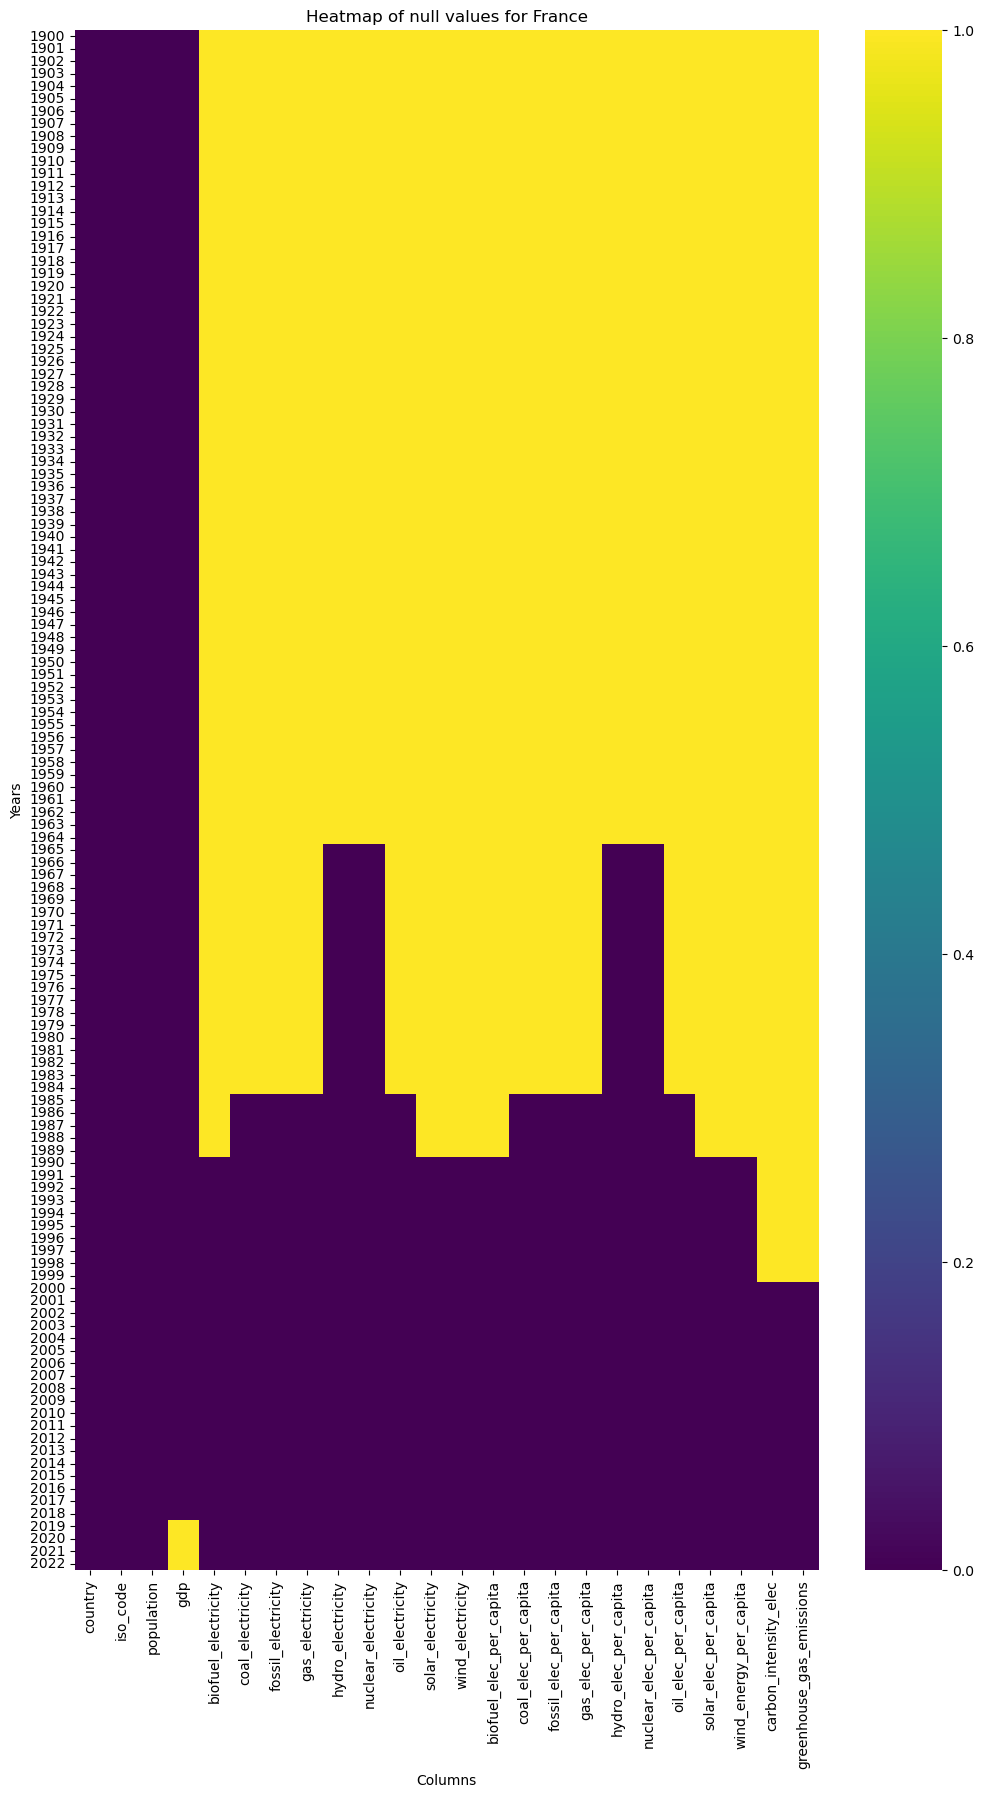

In [18]:
df_fr = df_analysis[df_analysis["country"]=="France"].copy()
plt.figure(figsize=(12, 20))
sns.heatmap(df_fr.set_index("year").isnull(), cmap="viridis", cbar=True, yticklabels=True)
plt.ylabel("Years")
plt.title("Heatmap of null values for France")
plt.xlabel("Columns")
plt.show()

We can see that before 1965, there are a significant number of missing values. To ensure the reliability of our analysis, we will keep only the data from 1965 onward.

In [19]:
df_fr=df_fr[df_fr["year"]>1964].copy()

For now, I'll use KNNImputer to handle the missing values, but we may reconsider this approach later. Our primary focus so far has been on analyzing and selecting the dataset.

In [20]:
df_fr.drop(columns=["country", "iso_code"],inplace=True)
imputer = KNNImputer(n_neighbors=5)
df_fr_imputed = imputer.fit_transform(df_fr)
df_fr_imputed = pd.DataFrame(df_fr_imputed, columns=df_fr.columns)
df_fr_imputed

,year,population,gdp,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,...,coal_elec_per_capita,fossil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,solar_elec_per_capita,wind_energy_per_capita,carbon_intensity_elec,greenhouse_gas_emissions
0,1965.0,48168800.0,7.275574e+11,7.686,11.6026,51.8036,30.8206,46.881,0.897,9.3804,...,201.7716,830.3398,479.4168,973.267,18.622,149.1512,190.6248,1212.0734,73.8808,38.916
1,1966.0,48683088.0,7.645141e+11,7.686,11.6026,51.8036,30.8206,52.208,1.395,9.3804,...,201.7716,830.3398,479.4168,1072.415,28.655,149.1512,190.6248,1212.0734,73.8808,38.916
2,1967.0,49181404.0,7.998648e+11,7.686,11.6026,51.8036,30.8206,45.378,2.076,9.3804,...,201.7716,830.3398,479.4168,922.659,42.211,149.1512,190.6248,1212.0734,73.8808,38.916
3,1968.0,49647272.0,8.351714e+11,7.686,11.6026,51.8036,30.8206,50.423,3.085,9.3804,...,201.7716,830.3398,479.4168,1015.617,62.138,149.1512,190.6248,1212.0734,73.8808,38.916
4,1969.0,50087056.0,8.931074e+11,7.686,11.6026,51.8036,30.8206,52.942,3.600,9.3804,...,201.7716,830.3398,479.4168,1057.001,71.875,149.1512,190.6248,1212.0734,73.8808,38.916
5,1970.0,50523588.0,9.442327e+11,7.686,11.6026,51.8036,30.8206,56.681,5.711,9.3804,...,201.7716,830.3398,479.4168,1121.882,113.036,149.1512,190.6248,1212.0734,73.8808,38.916
6,1971.0,50970696.0,9.899686e+11,7.686,11.6026,51.8036,30.8206,48.857,9.329,9.3804,...,201.7716,830.3398,479.4168,958.526,183.027,149.1512,190.6248,1212.0734,73.8808,38.916
7,1972.0,51410364.0,1.034025e+12,7.686,11.6026,51.8036,30.8206,48.831,14.591,9.3804,...,201.7716,830.3398,479.4168,949.837,283.814,149.1512,190.6248,1212.0734,73.8808,38.916
8,1973.0,51814076.0,1.090180e+12,7.686,11.6026,51.8036,30.8206,47.696,14.751,9.3804,...,201.7716,830.3398,479.4168,920.527,284.691,149.1512,190.6248,1212.0734,73.8808,38.916
9,1974.0,52163552.0,1.122228e+12,7.686,11.6026,51.8036,30.8206,56.230,14.710,9.3804,...,201.7716,830.3398,479.4168,1077.961,281.998,149.1512,190.6248,1212.0734,73.8808,38.916


In [21]:
# Initialisation de l'imputeur avec RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=20), random_state=42)

# Application de l'imputation
df_fr_imputed = imputer.fit_transform(df_fr)

# Conversion en DataFrame avec les mêmes colonnes
df_fr_imputed = pd.DataFrame(df_fr_imputed, columns=df_fr.columns)

df_fr_imputed

,year,population,gdp,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,...,coal_elec_per_capita,fossil_elec_per_capita,gas_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,oil_elec_per_capita,solar_elec_per_capita,wind_energy_per_capita,carbon_intensity_elec,greenhouse_gas_emissions
0,1965.0,48168800.0,7.275574e+11,2.4740,20.7110,48.97510,7.28520,46.881,0.897,7.13760,...,351.39860,841.00675,106.04500,973.267,18.622,134.98095,0.82415,109.53000,79.15710,43.2430
1,1966.0,48683088.0,7.645141e+11,2.2705,21.1445,37.35745,3.89925,52.208,1.395,6.80875,...,357.46320,657.53460,55.84520,1072.415,28.655,123.36015,0.69580,106.92905,65.41920,38.3130
2,1967.0,49181404.0,7.998648e+11,2.4510,20.6225,37.55295,7.29635,45.378,2.076,6.85680,...,356.16790,669.29495,105.91120,922.659,42.211,126.50455,0.82410,122.70280,65.41920,38.3190
3,1968.0,49647272.0,8.351714e+11,2.3230,21.0230,50.60950,4.36705,50.423,3.085,7.08955,...,353.01395,872.62740,57.03255,1015.617,62.138,133.74865,0.82425,107.44805,81.17825,43.9865
4,1969.0,50087056.0,8.931074e+11,2.2705,21.1235,37.65465,3.91100,52.942,3.600,6.79215,...,356.55515,673.45175,55.84520,1057.001,71.875,123.36015,0.82420,107.13415,65.41920,38.3130
5,1970.0,50523588.0,9.442327e+11,2.2705,21.1235,37.65465,3.91995,56.681,5.711,6.79215,...,356.55515,668.66805,55.84520,1121.882,113.036,123.36015,0.82420,107.13415,65.70095,38.3130
6,1971.0,50970696.0,9.899686e+11,2.4740,20.7850,50.66180,7.28240,48.857,9.329,7.13760,...,351.05945,863.13605,106.04500,958.526,183.027,134.70920,0.82415,109.53000,81.15395,43.8730
7,1972.0,51410364.0,1.034025e+12,2.4510,20.6225,37.73945,7.29635,48.831,14.591,6.84020,...,356.16790,678.38995,105.91120,949.837,283.814,126.50455,0.82410,109.21610,65.41920,38.3190
8,1973.0,51814076.0,1.090180e+12,2.4510,20.6225,37.55295,7.29635,47.696,14.751,6.85680,...,356.16790,669.29495,105.91120,920.527,284.691,126.50455,0.82410,122.70280,65.41920,38.3190
9,1974.0,52163552.0,1.122228e+12,2.2705,21.1235,37.65465,3.91995,56.230,14.710,6.79215,...,356.55515,668.66805,55.84520,1077.961,281.998,123.36015,0.82420,107.13415,65.41920,38.3130


Now, let's create some quick predictions using Prophet, a powerful forecasting tool available in Python. We will use it to predict the evolution of electricity generation from different energy sources in France.

23:06:48 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour population...


23:06:48 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour population - MAE: 1039396.19, RMSE: 1293040.54


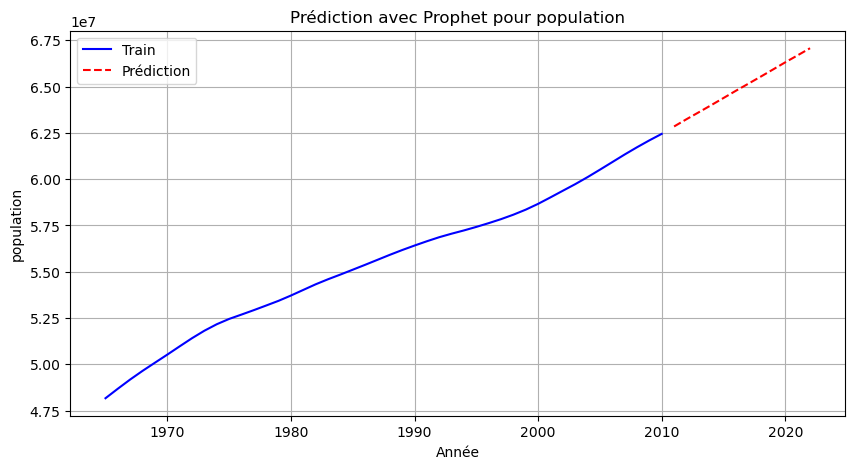


Prédiction pour gdp...


23:06:48 - cmdstanpy - INFO - Chain [1] start processing
23:06:48 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour gdp - MAE: 226152157901.53, RMSE: 242557929947.71


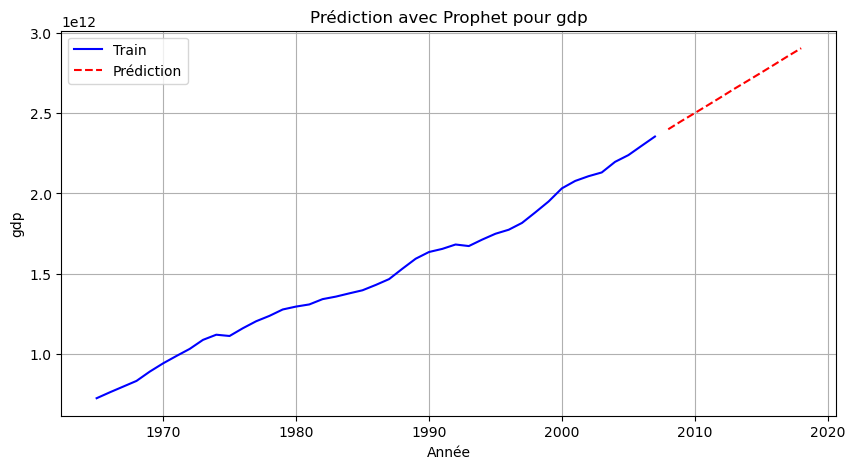

23:06:49 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour biofuel_electricity...


23:06:49 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour biofuel_electricity - MAE: 0.82, RMSE: 0.84


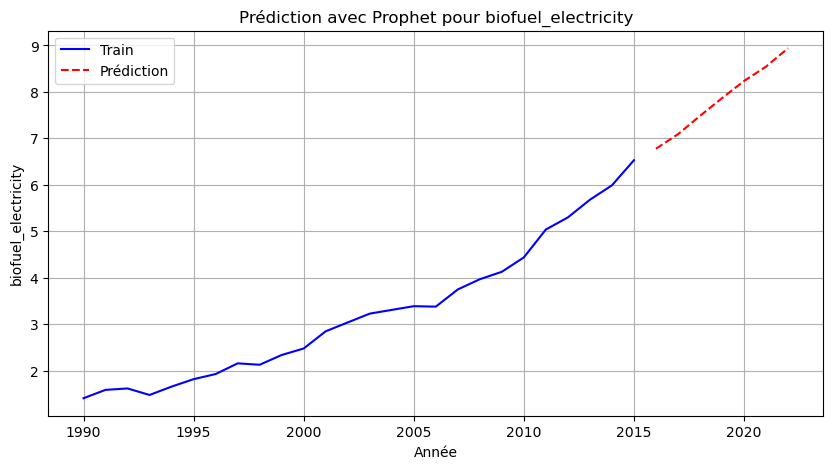


Prédiction pour coal_electricity...


23:06:49 - cmdstanpy - INFO - Chain [1] start processing
23:06:49 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour coal_electricity - MAE: 9.45, RMSE: 9.87


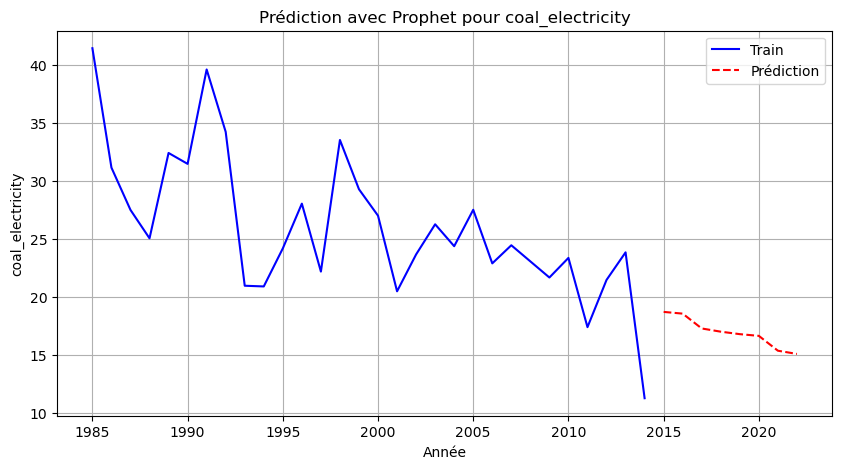

23:06:49 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour fossil_electricity...


23:06:50 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour fossil_electricity - MAE: 7.85, RMSE: 8.69


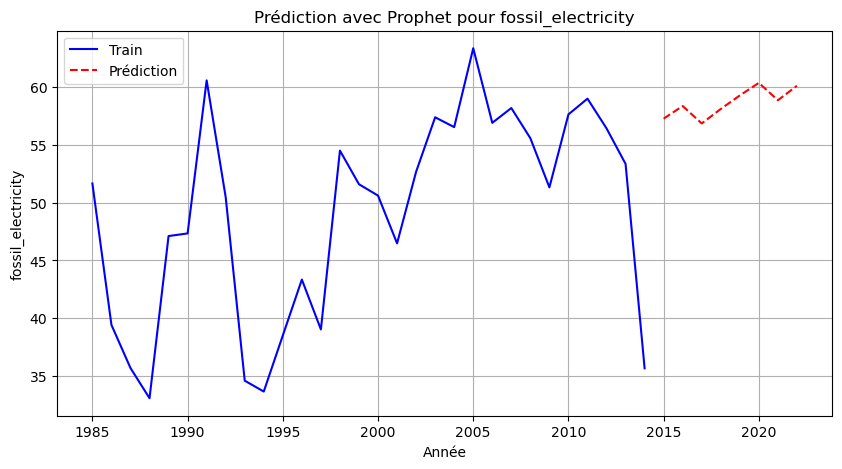


Prédiction pour gas_electricity...


23:06:50 - cmdstanpy - INFO - Chain [1] start processing
23:06:50 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour gas_electricity - MAE: 6.95, RMSE: 7.93


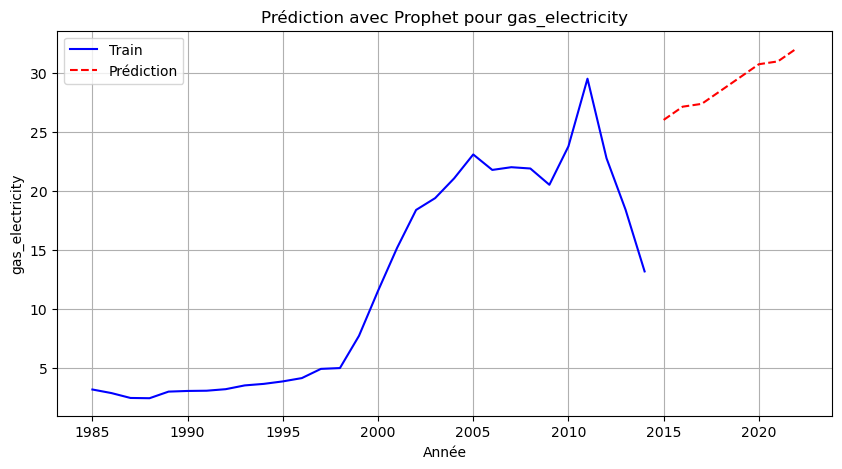

23:06:50 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour hydro_electricity...


23:06:51 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour hydro_electricity - MAE: 9.52, RMSE: 11.34


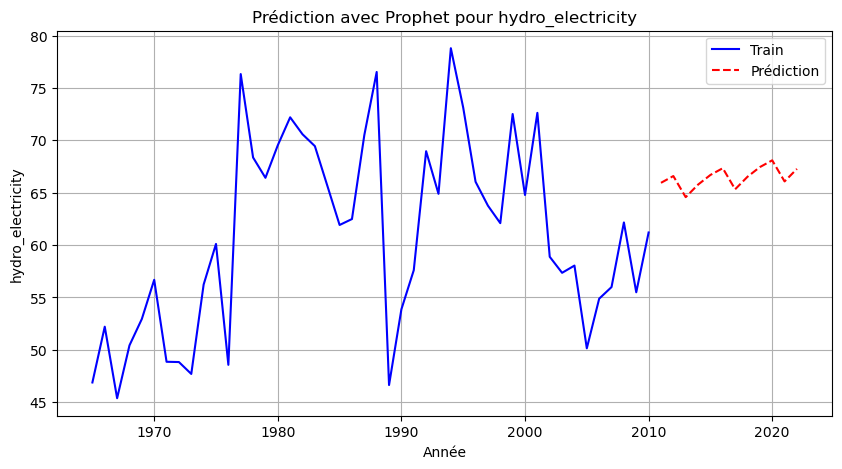

23:06:51 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour nuclear_electricity...


23:06:51 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour nuclear_electricity - MAE: 201.95, RMSE: 217.53


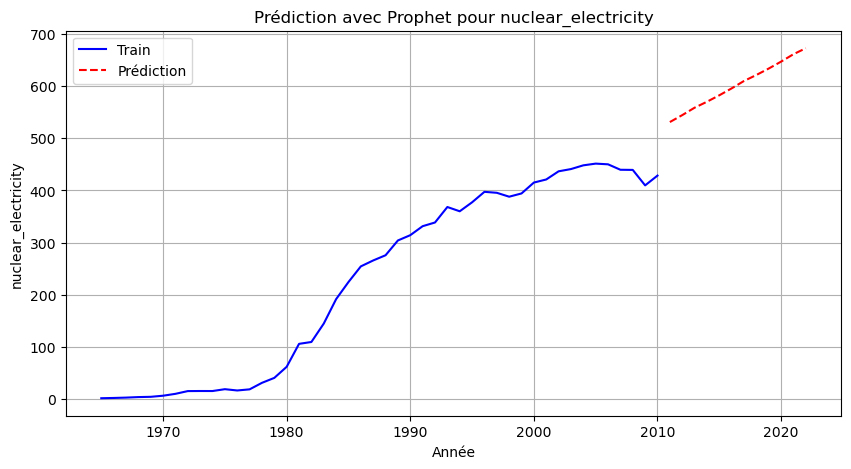

23:06:52 - cmdstanpy - INFO - Chain [1] start processing
23:06:52 - cmdstanpy - INFO - Chain [1] done processing



Prédiction pour oil_electricity...
Évaluation pour oil_electricity - MAE: 2.18, RMSE: 2.40


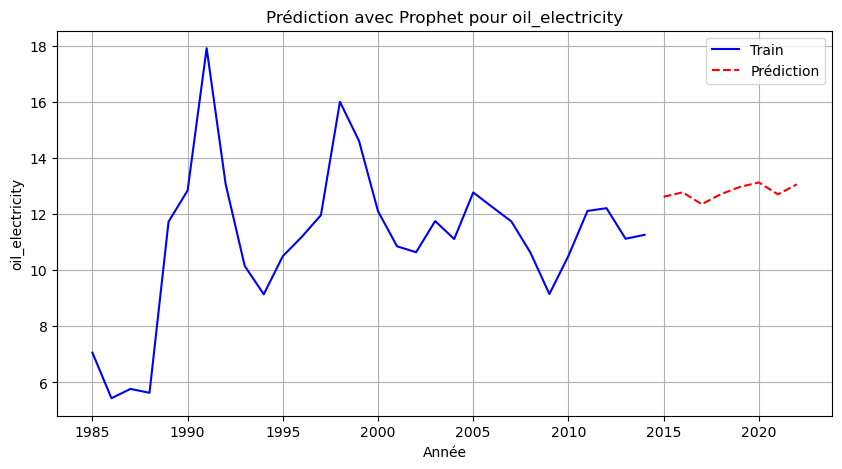

23:06:52 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour solar_electricity...


23:06:52 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour solar_electricity - MAE: 8.61, RMSE: 9.20


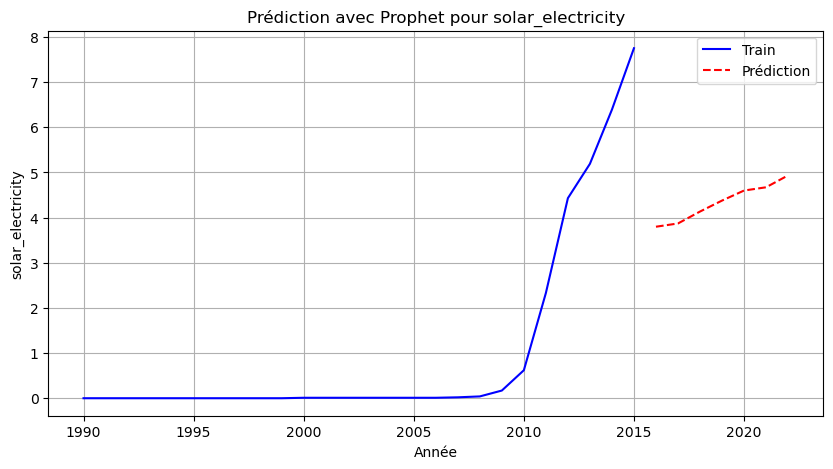


Prédiction pour wind_electricity...


23:06:52 - cmdstanpy - INFO - Chain [1] start processing
23:06:53 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour wind_electricity - MAE: 15.59, RMSE: 16.48


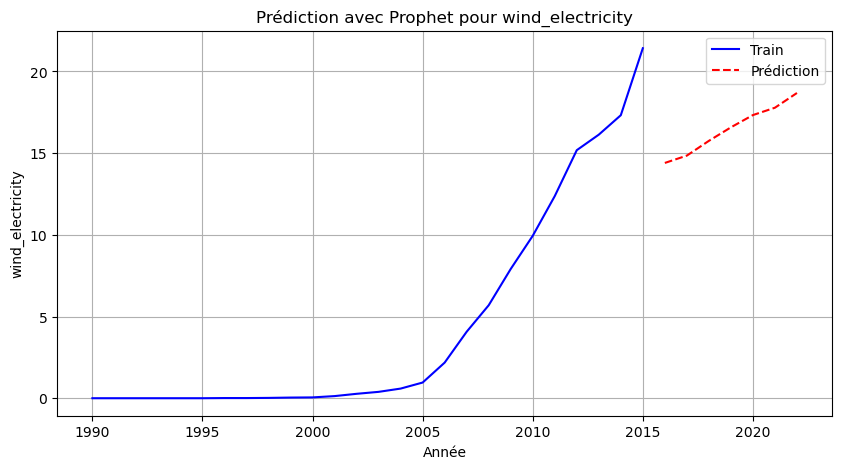

23:06:53 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour biofuel_elec_per_capita...


23:06:53 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour biofuel_elec_per_capita - MAE: 13.67, RMSE: 14.01


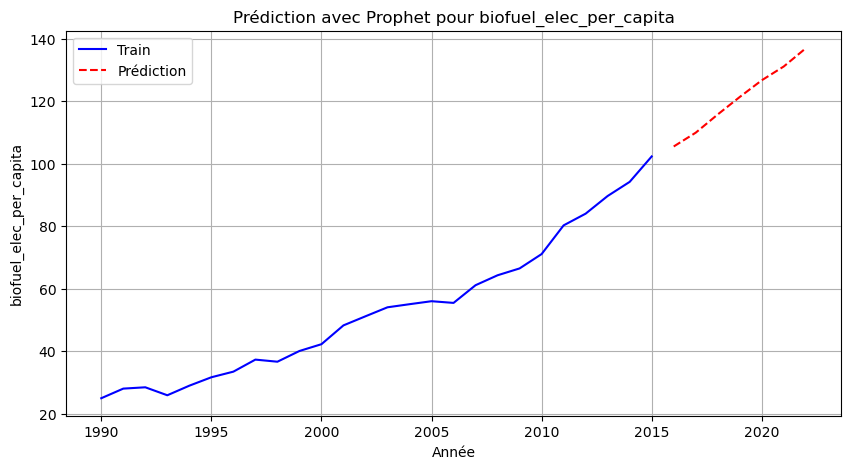


Prédiction pour coal_elec_per_capita...


23:06:53 - cmdstanpy - INFO - Chain [1] start processing
23:06:53 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour coal_elec_per_capita - MAE: 132.49, RMSE: 138.70


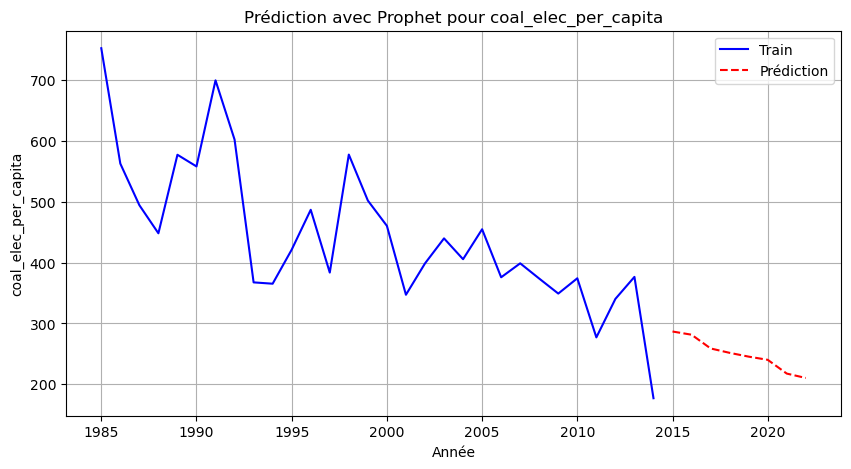

23:06:54 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour fossil_elec_per_capita...


23:06:54 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour fossil_elec_per_capita - MAE: 124.41, RMSE: 137.52


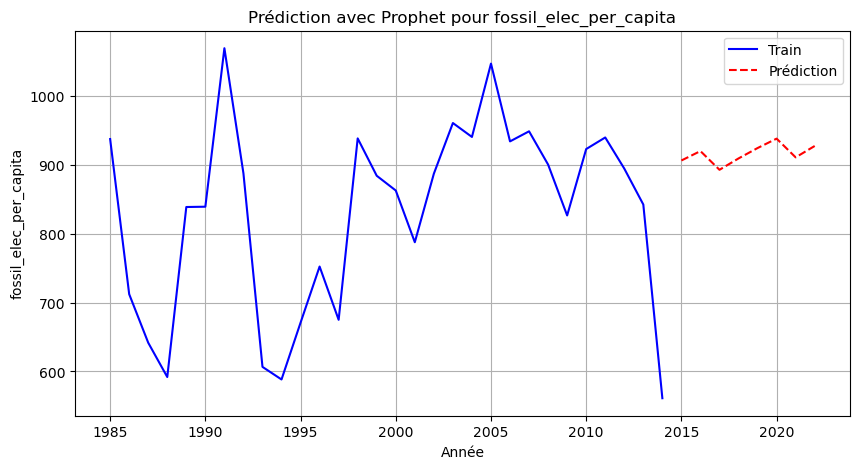

23:06:54 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour gas_elec_per_capita...


23:06:54 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour gas_elec_per_capita - MAE: 96.54, RMSE: 112.91


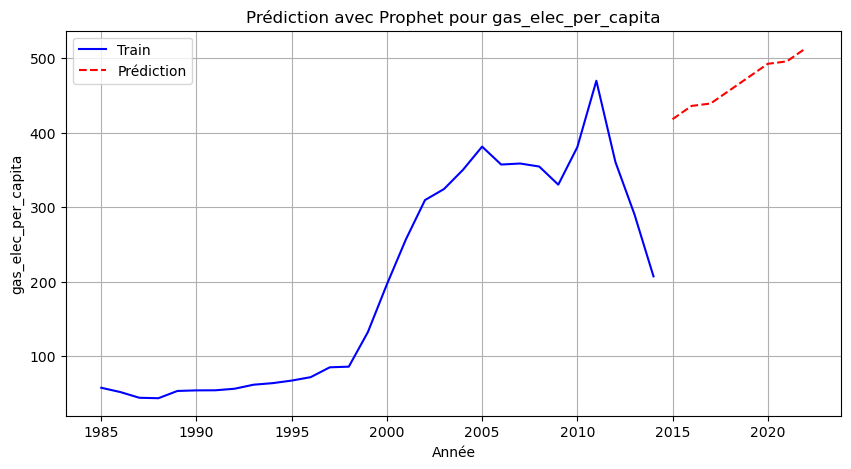


Prédiction pour hydro_elec_per_capita...


23:06:55 - cmdstanpy - INFO - Chain [1] start processing
23:06:55 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour hydro_elec_per_capita - MAE: 153.48, RMSE: 181.36


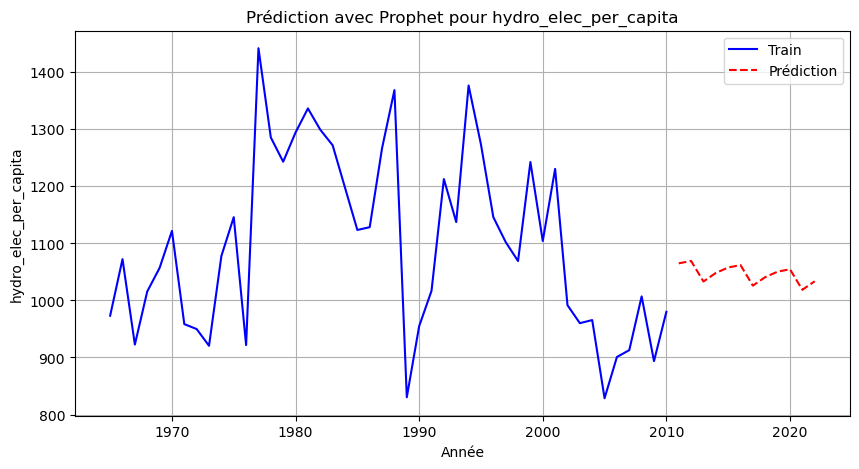

23:06:55 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour nuclear_elec_per_capita...


23:06:55 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour nuclear_elec_per_capita - MAE: 3846.72, RMSE: 4077.90


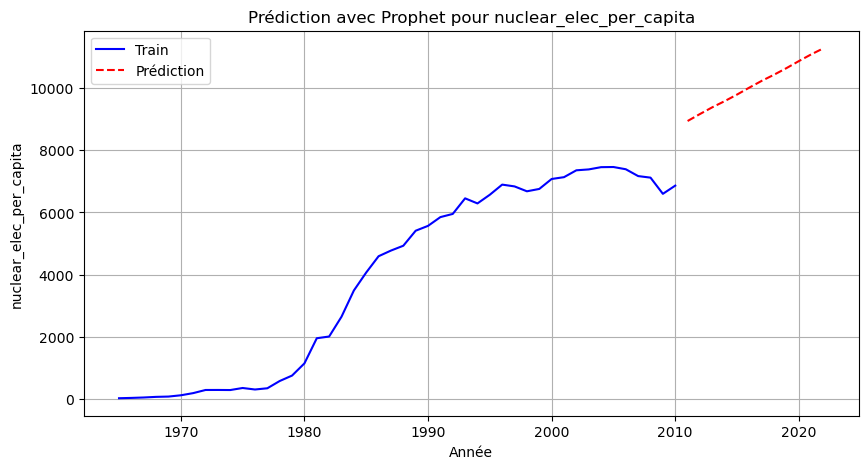

23:06:56 - cmdstanpy - INFO - Chain [1] start processing



Prédiction pour oil_elec_per_capita...


23:06:56 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour oil_elec_per_capita - MAE: 35.29, RMSE: 38.17


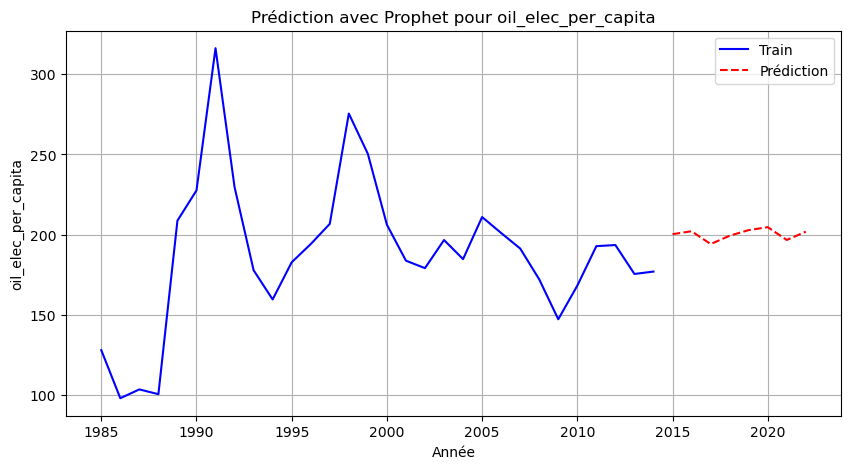


Prédiction pour solar_elec_per_capita...


23:06:56 - cmdstanpy - INFO - Chain [1] start processing
23:06:56 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour solar_elec_per_capita - MAE: 132.72, RMSE: 141.71


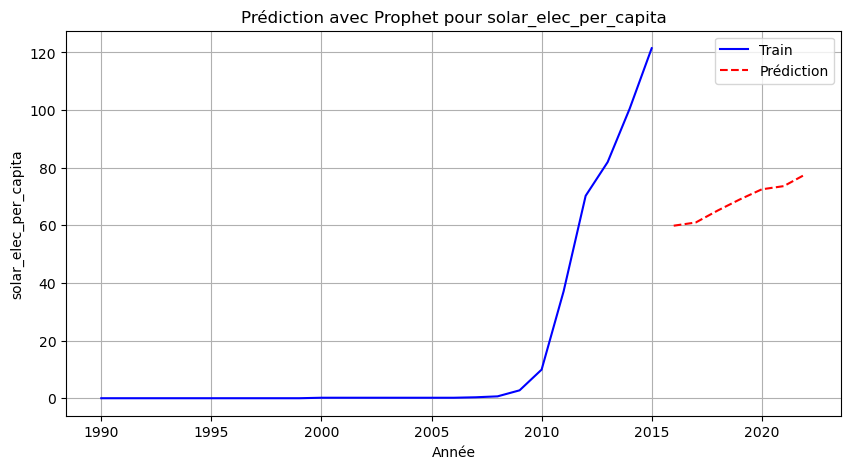


Prédiction pour wind_energy_per_capita...


23:06:56 - cmdstanpy - INFO - Chain [1] start processing
23:06:57 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour wind_energy_per_capita - MAE: 594.17, RMSE: 627.49


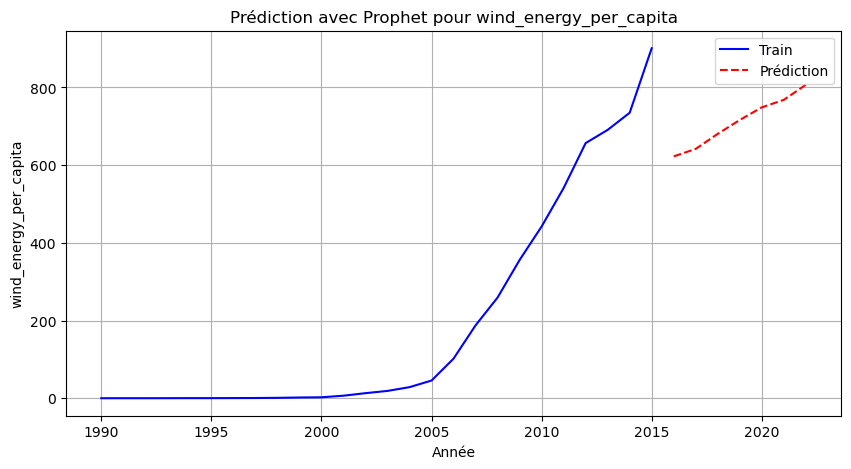


Prédiction pour carbon_intensity_elec...


23:06:57 - cmdstanpy - INFO - Chain [1] start processing
23:06:57 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour carbon_intensity_elec - MAE: 6.99, RMSE: 7.75


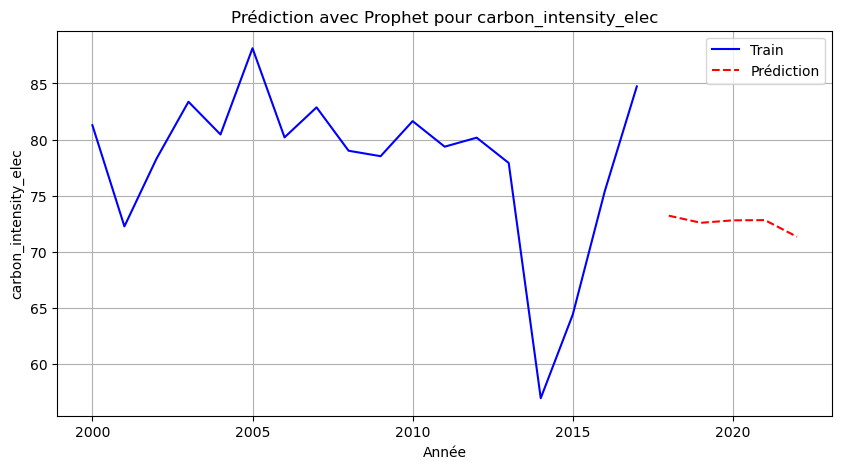


Prédiction pour greenhouse_gas_emissions...


23:06:57 - cmdstanpy - INFO - Chain [1] start processing
23:06:57 - cmdstanpy - INFO - Chain [1] done processing


Évaluation pour greenhouse_gas_emissions - MAE: 3.59, RMSE: 3.96


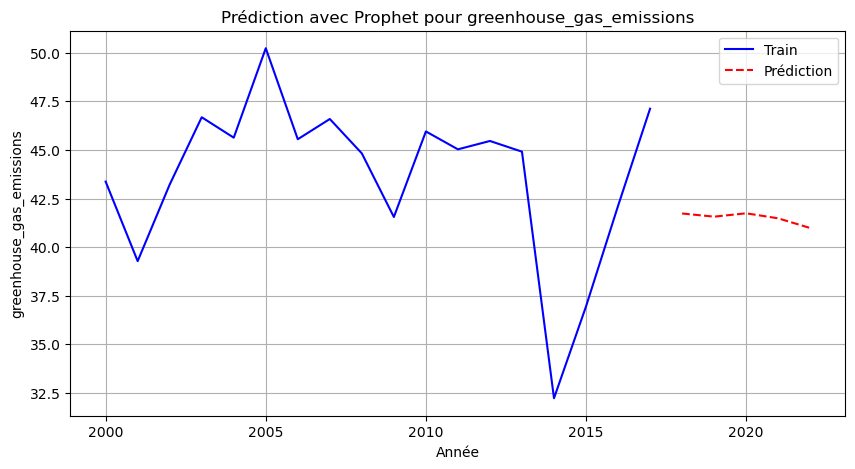


Résumé des performances :
                    Variable           MAE          RMSE
0                 population  1.039396e+06  1.293041e+06
1                        gdp  2.261522e+11  2.425579e+11
2        biofuel_electricity  8.234164e-01  8.439681e-01
3           coal_electricity  9.447583e+00  9.873346e+00
4         fossil_electricity  7.850237e+00  8.690441e+00
5            gas_electricity  6.949389e+00  7.928576e+00
6          hydro_electricity  9.520029e+00  1.133662e+01
7        nuclear_electricity  2.019541e+02  2.175263e+02
8            oil_electricity  2.183039e+00  2.396511e+00
9          solar_electricity  8.612808e+00  9.203217e+00
10          wind_electricity  1.558518e+01  1.647558e+01
11   biofuel_elec_per_capita  1.366853e+01  1.400701e+01
12      coal_elec_per_capita  1.324869e+02  1.387015e+02
13    fossil_elec_per_capita  1.244092e+02  1.375247e+02
14       gas_elec_per_capita  9.653589e+01  1.129116e+02
15     hydro_elec_per_capita  1.534805e+02  1.813636e+02
16  

In [22]:
# Charger les données (assuming df_fr exists)
df = df_fr.copy()

# Exclure les colonnes non numériques et 'year'
variables_to_predict = [col for col in df.columns if col not in ["year"]]

# Stockage des résultats
metrics = []

# Boucle sur chaque variable
for target_variable in variables_to_predict:
    print(f"\nPrédiction pour {target_variable}...")

    # Préparer les données
    df_prophet = df[["year", target_variable]].dropna().copy()
    df_prophet.rename(columns={"year": "ds", target_variable: "y"}, inplace=True)

    # Vérifier s'il y a assez de données
    if len(df_prophet) < 10:
        print(f"Pas assez de données pour {target_variable}, on passe à la suivante.")
        continue

    # Séparation Train/Test (80% Train - 20% Test)
    split_index = int(len(df_prophet) * 0.8)
    df_train = df_prophet.iloc[:split_index]
    df_test = df_prophet.iloc[split_index:].copy()

    # Initialisation et entraînement du modèle Prophet
    model = Prophet(interval_width=0.95)  # Default backend (CmdStanPy in newer versions)
    model.fit(df_train)

    # Prédiction sur la période du test
    future = df_test[["ds"]]
    forecast = model.predict(future)

    # Ajouter les prédictions dans le test set
    df_test.loc[:, "yhat"] = forecast["yhat"].values

    # Évaluer la performance du modèle
    mae = mean_absolute_error(df_test["y"], df_test["yhat"])
    rmse = np.sqrt(mean_squared_error(df_test["y"], df_test["yhat"]))

    print(f"Évaluation pour {target_variable} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    # Stocker les résultats
    metrics.append({"Variable": target_variable, "MAE": mae, "RMSE": rmse})

    # Affichage des résultats
    plt.figure(figsize=(10, 5))
    plt.plot(df_train["ds"], df_train["y"], label="Train", color="blue")
    plt.plot(df_test["ds"], df_test["yhat"], label="Prédiction", color="red", linestyle="dashed")
    plt.xlabel("Année")
    plt.ylabel(target_variable)
    plt.title(f"Prédiction avec Prophet pour {target_variable}")
    plt.legend()
    plt.grid()
    plt.show()

# Conversion des résultats en DataFrame et affichage
metrics_df = pd.DataFrame(metrics)
print("\nRésumé des performances :")
print(metrics_df)

Lets now try an other model to predict the evolution, this time we will use a LSTM model from the tensorflow library.


Prédiction pour population...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Évaluation pour population - MAE: 2490483.43, RMSE: 2524261.73


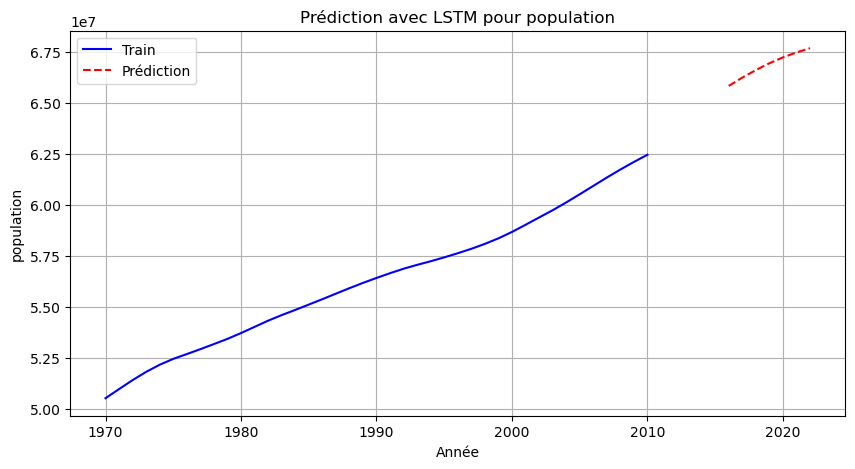


Prédiction pour gdp...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Évaluation pour gdp - MAE: 223897670997.33, RMSE: 224417541714.82


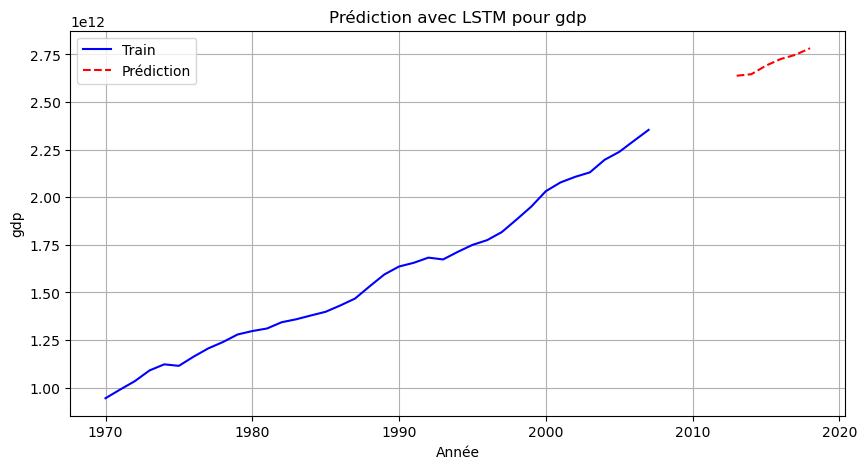


Prédiction pour biofuel_electricity...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
Évaluation pour biofuel_electricity - MAE: 2.53, RMSE: 2.53


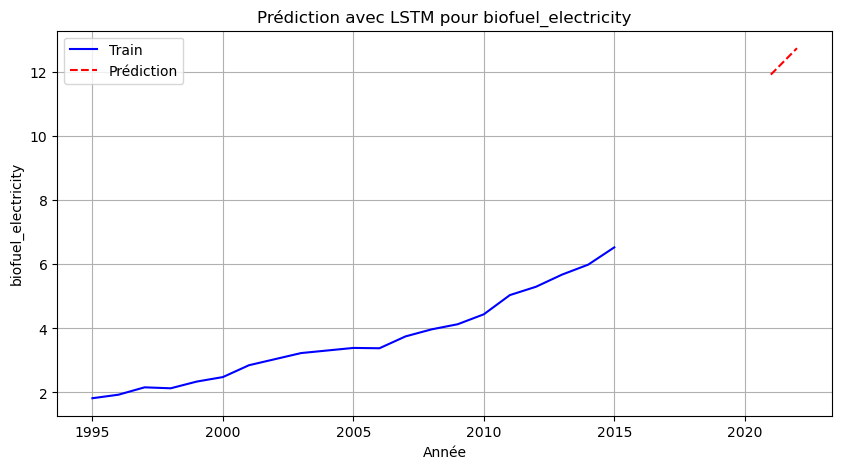


Prédiction pour coal_electricity...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Évaluation pour coal_electricity - MAE: 11.03, RMSE: 11.11


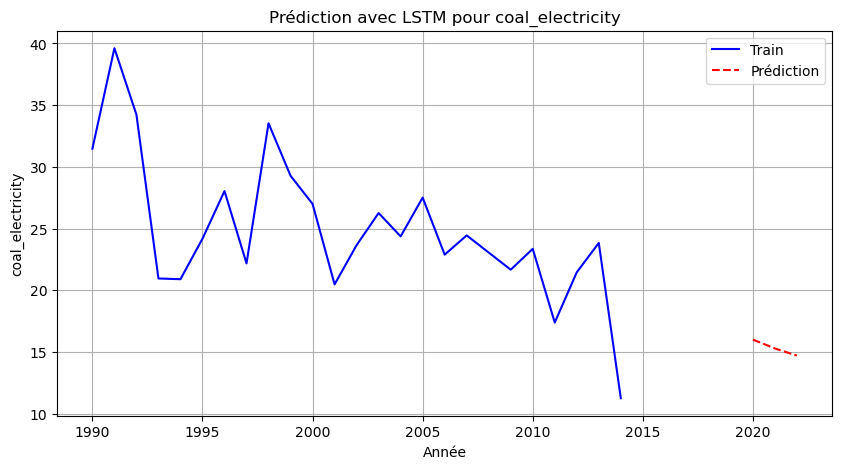


Prédiction pour fossil_electricity...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Évaluation pour fossil_electricity - MAE: 4.40, RMSE: 4.41


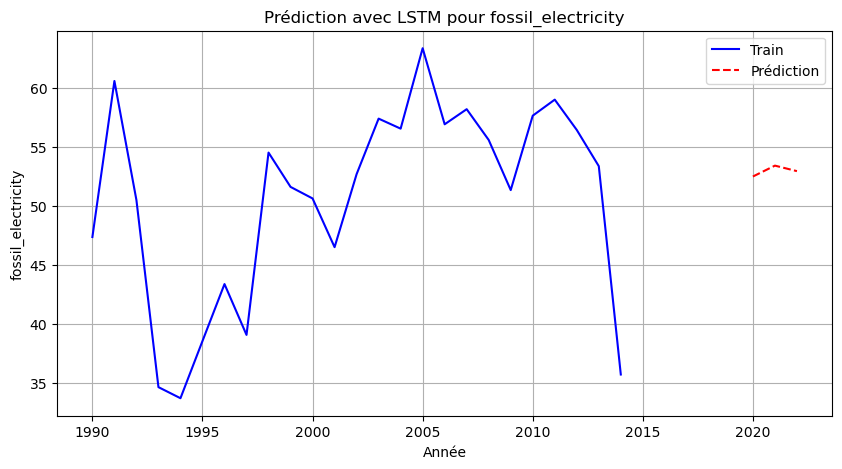


Prédiction pour gas_electricity...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
Évaluation pour gas_electricity - MAE: 3.87, RMSE: 4.06


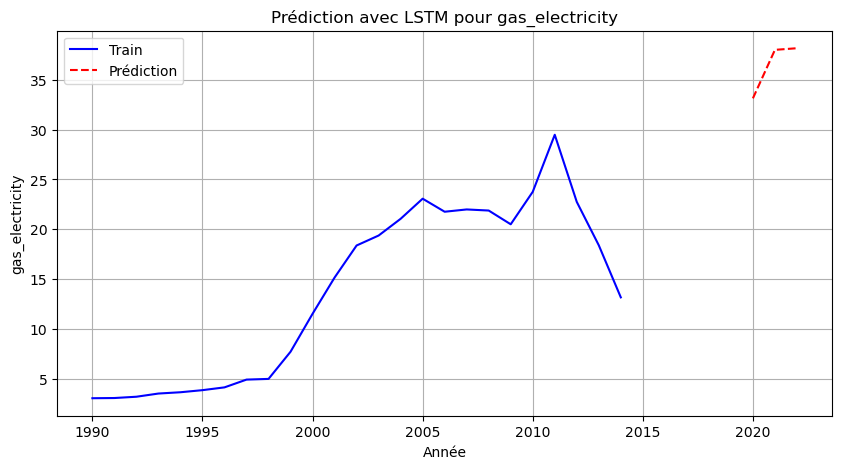


Prédiction pour hydro_electricity...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Évaluation pour hydro_electricity - MAE: 5.46, RMSE: 7.66


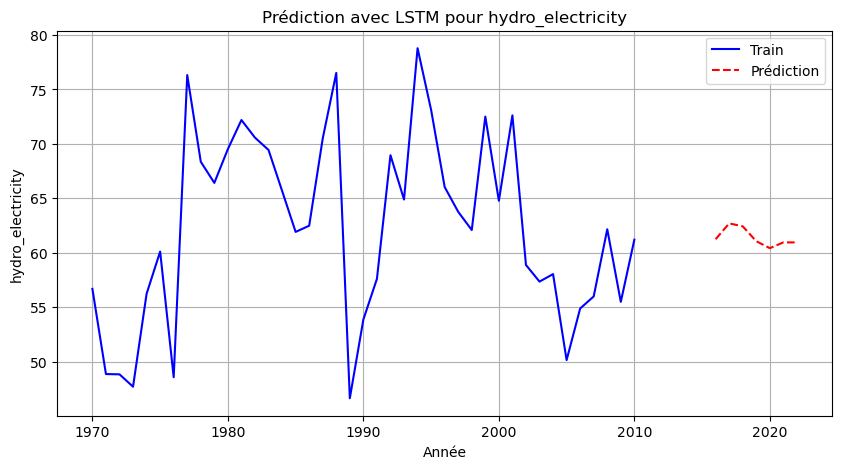


Prédiction pour nuclear_electricity...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Évaluation pour nuclear_electricity - MAE: 59.61, RMSE: 65.94


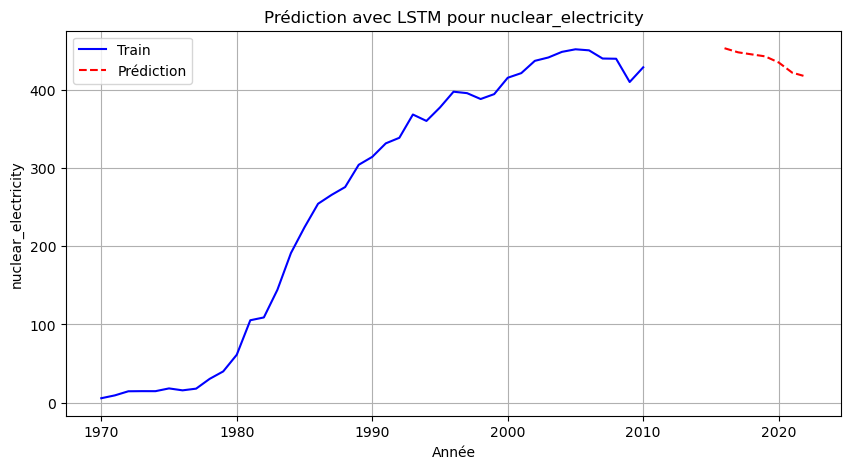


Prédiction pour oil_electricity...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Évaluation pour oil_electricity - MAE: 1.93, RMSE: 1.94


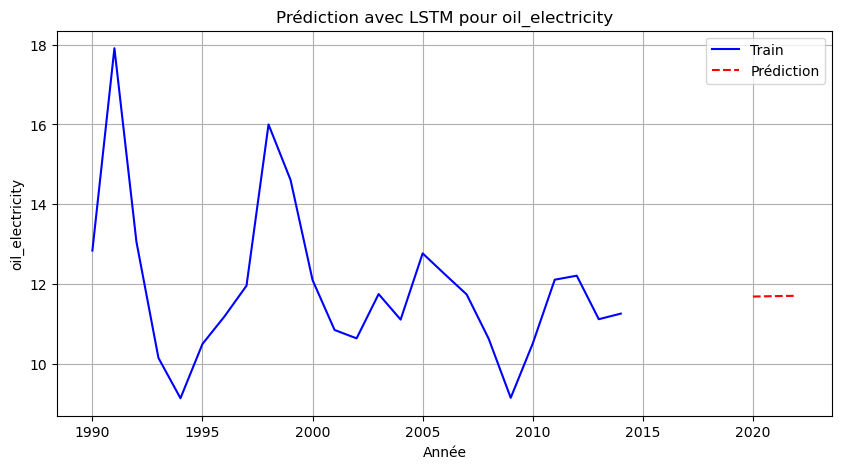


Prédiction pour solar_electricity...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Évaluation pour solar_electricity - MAE: 9.19, RMSE: 9.20


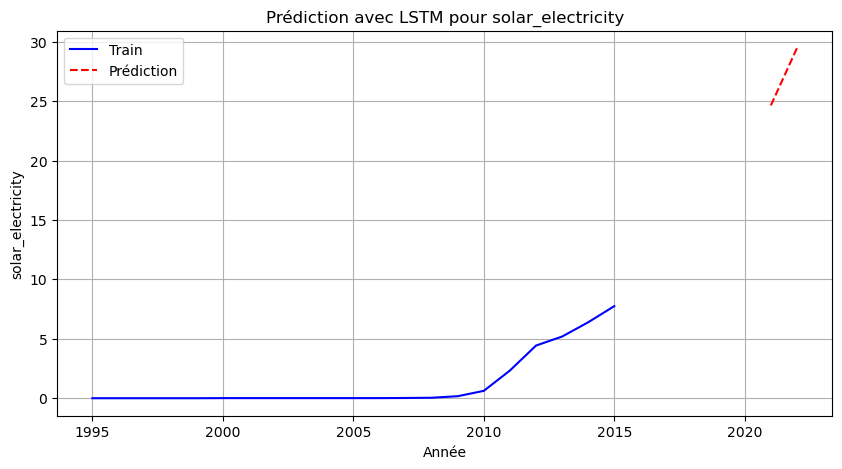


Prédiction pour wind_electricity...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Évaluation pour wind_electricity - MAE: 2.58, RMSE: 3.21


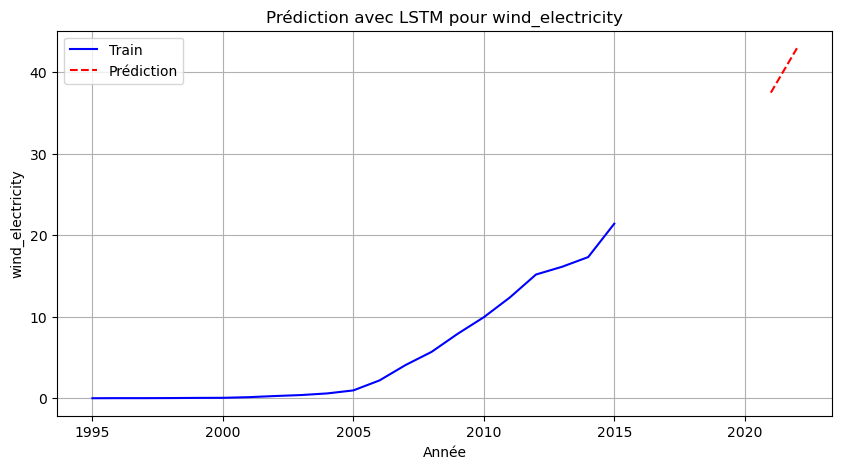


Prédiction pour biofuel_elec_per_capita...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Évaluation pour biofuel_elec_per_capita - MAE: 53.24, RMSE: 53.41


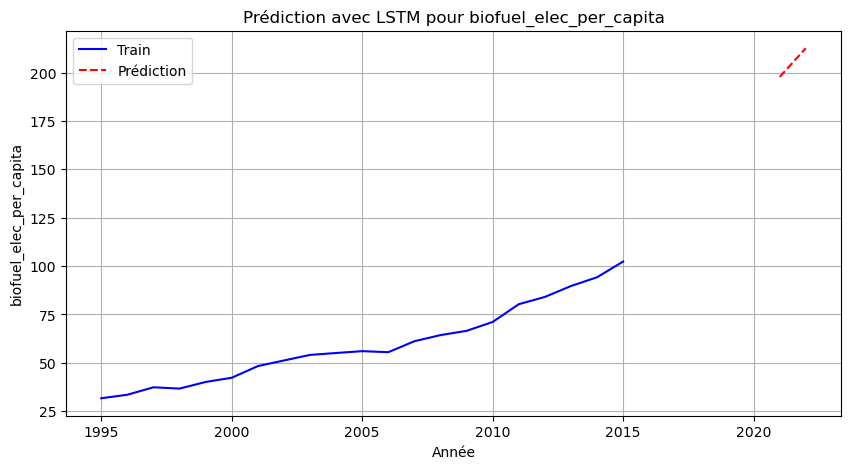


Prédiction pour coal_elec_per_capita...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Évaluation pour coal_elec_per_capita - MAE: 186.46, RMSE: 187.70


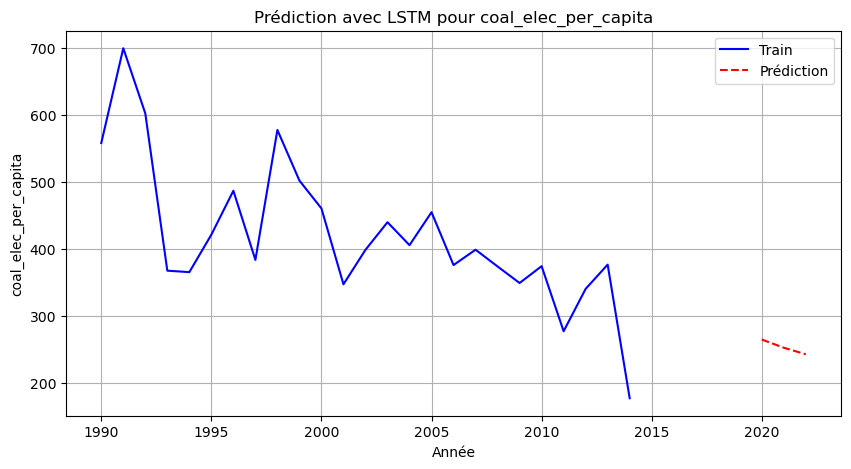


Prédiction pour fossil_elec_per_capita...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Évaluation pour fossil_elec_per_capita - MAE: 80.53, RMSE: 89.32


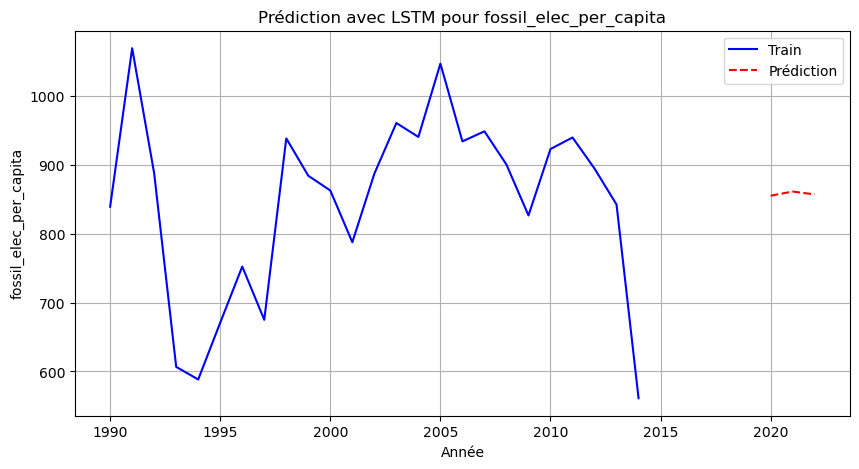


Prédiction pour gas_elec_per_capita...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Évaluation pour gas_elec_per_capita - MAE: 63.81, RMSE: 65.13


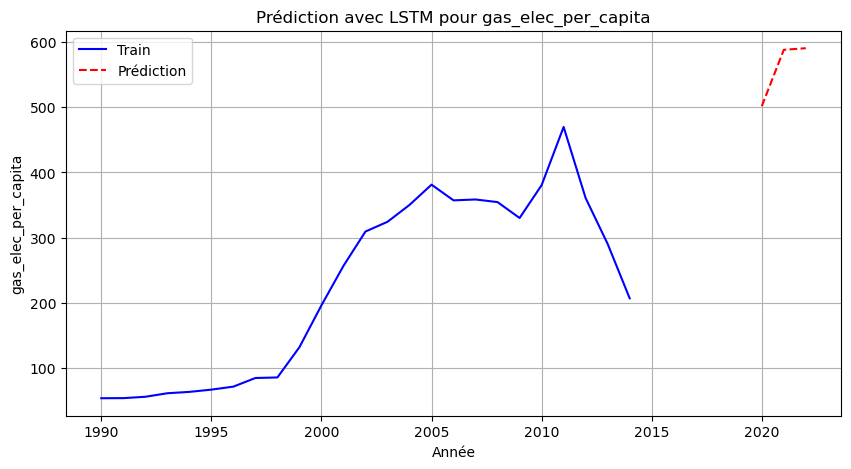


Prédiction pour hydro_elec_per_capita...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Évaluation pour hydro_elec_per_capita - MAE: 116.82, RMSE: 154.70


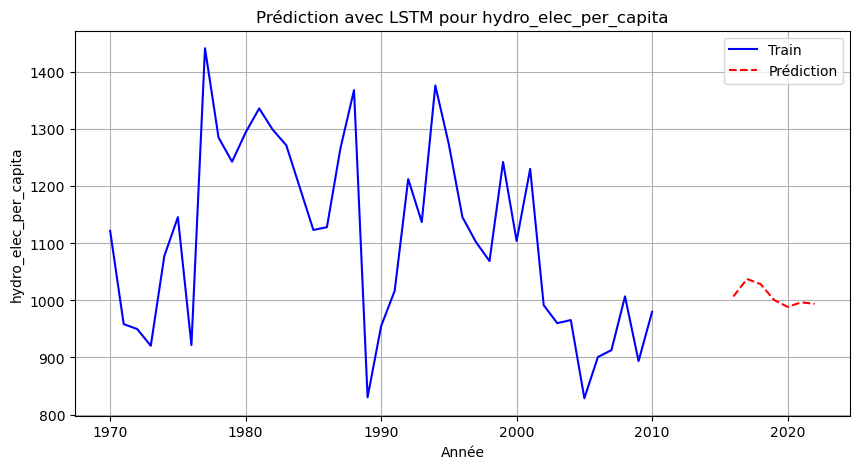


Prédiction pour nuclear_elec_per_capita...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Évaluation pour nuclear_elec_per_capita - MAE: 1002.25, RMSE: 1094.03


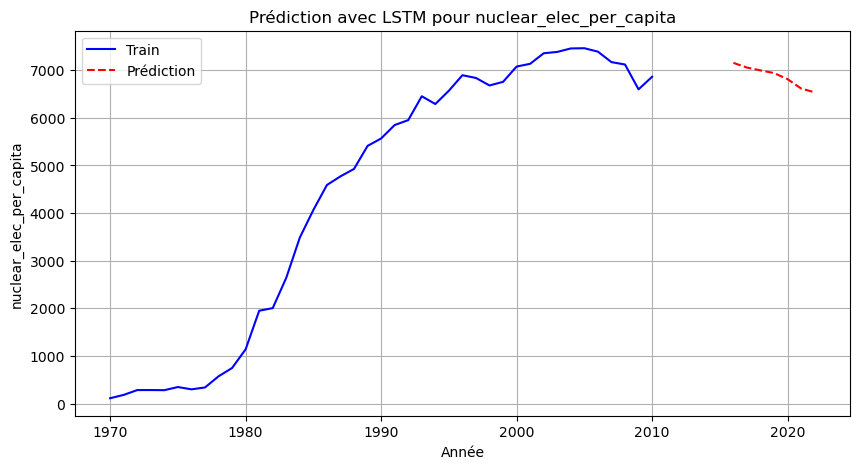


Prédiction pour oil_elec_per_capita...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Évaluation pour oil_elec_per_capita - MAE: 48.27, RMSE: 48.30


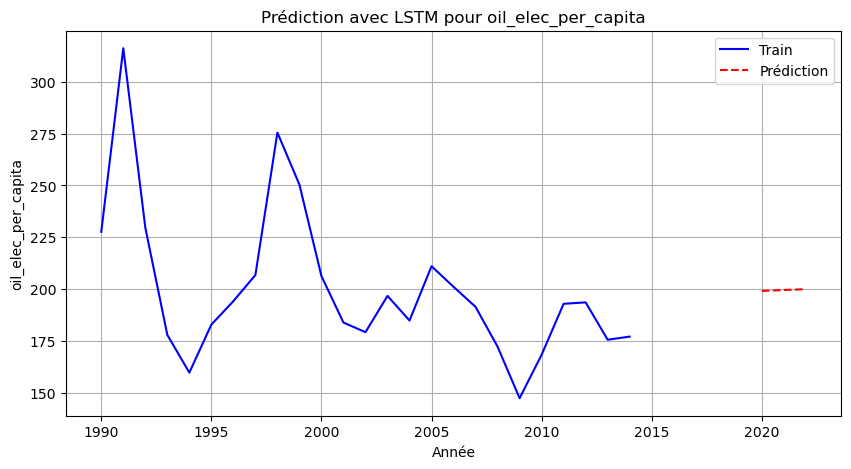


Prédiction pour solar_elec_per_capita...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Évaluation pour solar_elec_per_capita - MAE: 213.95, RMSE: 214.33


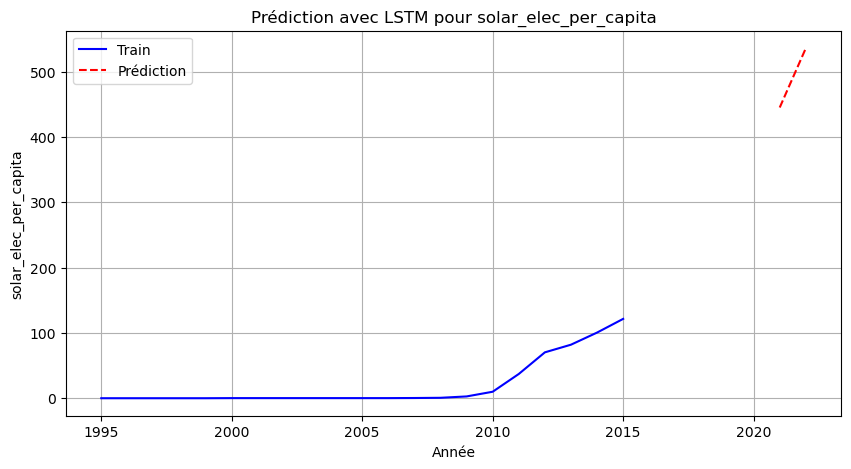


Prédiction pour wind_energy_per_capita...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Évaluation pour wind_energy_per_capita - MAE: 568.14, RMSE: 587.96


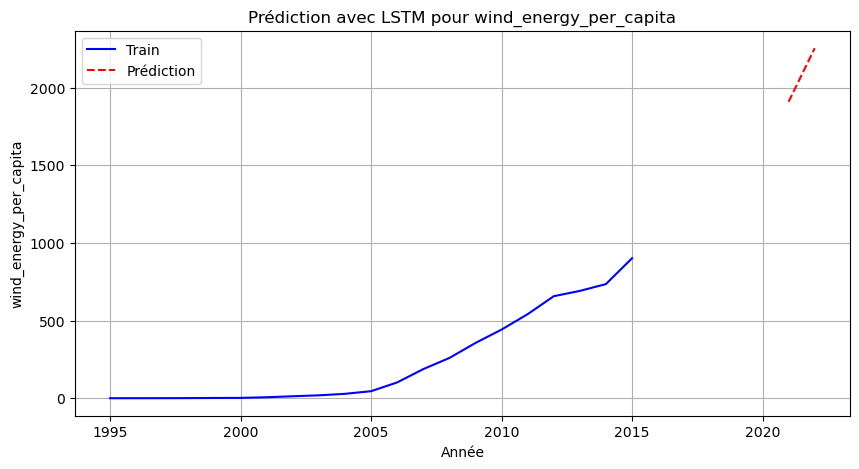


Prédiction pour carbon_intensity_elec...

Prédiction pour greenhouse_gas_emissions...

Résumé des performances :
                   Variable           MAE          RMSE
0                population  2.490483e+06  2.524262e+06
1                       gdp  2.238977e+11  2.244175e+11
2       biofuel_electricity  2.525162e+00  2.533210e+00
3          coal_electricity  1.102747e+01  1.110987e+01
4        fossil_electricity  4.399582e+00  4.406675e+00
5           gas_electricity  3.869293e+00  4.060247e+00
6         hydro_electricity  5.458785e+00  7.658171e+00
7       nuclear_electricity  5.960586e+01  6.594157e+01
8           oil_electricity  1.934218e+00  1.936123e+00
9         solar_electricity  9.191446e+00  9.195756e+00
10         wind_electricity  2.579291e+00  3.209667e+00
11  biofuel_elec_per_capita  5.324217e+01  5.341325e+01
12     coal_elec_per_capita  1.864564e+02  1.876974e+02
13   fossil_elec_per_capita  8.053282e+01  8.931992e+01
14      gas_elec_per_capita  6.380994e+01  6.5

In [23]:
# Charger les données
df = df_fr.copy()

# Exclure les colonnes non numériques et 'year'
variables_to_predict = [col for col in df.columns if col not in ["year"]]

# Stockage des résultats
metrics = []

# Boucle sur chaque variable
for target_variable in variables_to_predict:
    print(f"\nPrédiction pour {target_variable}...")
    
    # Préparer les données
    df_lstm = df[["year", target_variable]].dropna().copy()
    df_lstm.rename(columns={"year": "ds", target_variable: "y"}, inplace=True)
    
    if len(df_lstm) < 10:
        print(f"Pas assez de données pour {target_variable}, on passe à la suivante.")
        continue
    
    # Normalisation des données
    scaler = MinMaxScaler()
    df_lstm["y"] = scaler.fit_transform(df_lstm["y"].values.reshape(-1, 1))
    
    # Séparation Train/Test (80% Train - 20% Test)
    split_index = int(len(df_lstm) * 0.8)
    df_train = df_lstm.iloc[:split_index]
    df_test = df_lstm.iloc[split_index:].copy()
    
    # Création des séquences pour LSTM
    def create_sequences(data, seq_length=5):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)
    
    seq_length = 5
    X_train, y_train = create_sequences(df_train["y"].values, seq_length)
    X_test, y_test = create_sequences(df_test["y"].values, seq_length)

    if X_train.shape[0] == 0 or X_test.shape[0] == 0:
        continue
    # Reshape pour LSTM (samples, time steps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Création du modèle LSTM
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    
    # Entraînement
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    
    # Prédiction
    y_pred = model.predict(X_test)
    
    # Inverse transform des données
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)
    
    # Évaluation
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    
    print(f"Évaluation pour {target_variable} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    
    metrics.append({"Variable": target_variable, "MAE": mae, "RMSE": rmse})
    
    # Affichage des résultats
    plt.figure(figsize=(10, 5))
    plt.plot(df_train["ds"].values[seq_length:], scaler.inverse_transform(df_train["y"].values[seq_length:].reshape(-1, 1)), label="Train", color="blue")
    plt.plot(df_test["ds"].values[seq_length:], y_pred_inv, label="Prédiction", color="red", linestyle="dashed")
    plt.xlabel("Année")
    plt.ylabel(target_variable)
    plt.title(f"Prédiction avec LSTM pour {target_variable}")
    plt.legend()
    plt.grid()
    plt.show()

# Conversion des résultats en DataFrame
metrics_df = pd.DataFrame(metrics)
print("\nRésumé des performances :")
print(metrics_df)

# Conclusion
***

Our analysis and predictions are not yet complete, so we are unable to draw any conclusions at this stage.